<a href="https://colab.research.google.com/github/malik214-rgb/Analisis-Alumni-FST-UIN-Jakarta_Capstone-1_Data-MIning/blob/main/CapStone_01_Group_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# CapStone Project 01 - Kelompok H

In [1]:
# @title Anggota Kelompok H
import pandas as pd

NIM = [11220940000004, 11220940000031, 11220940000033, 11220940000047, 11220940000056]
Nama = ['Rio Tri Wibowo', 'Ahmad Fauzan', 'Arjuananta Malik', 'Rajwaa Warda Yunenda Putri', 'Syafiqah Marsya Kholiyadi']
tabnama = pd.DataFrame(zip(NIM, Nama), columns=['NIM','Nama'])
newwtabnama = tabnama.style.set_properties(subset=['Nama'], **{'text-align': 'left'}) \
                              .set_table_styles([
                                  {'selector': 'th', 'props': [('text-align', 'center')]}
                              ])
newwtabnama

,NIM,Nama
0,11220940000004,Rio Tri Wibowo
1,11220940000031,Ahmad Fauzan
2,11220940000033,Arjuananta Malik
3,11220940000047,Rajwaa Warda Yunenda Putri
4,11220940000056,Syafiqah Marsya Kholiyadi


#Loading data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install kmodes
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes
import pickle

In [5]:
url = 'https://raw.githubusercontent.com/RajwaaWarda/CapStone-01---Group-H/refs/heads/main/alumni.csv'
# Membaca data dari file CSV
df = pd.read_csv(url)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Timestamp                                                       435 non-null    object 
 1   Nomor Induk Mahasiswa (NIM)                                     435 non-null    int64  
 2   Tahun Masuk UIN Jakarta                                         435 non-null    object 
 3   Tahun Wisuda                                                    435 non-null    object 
 4   Bulan Wisuda                                                    435 non-null    object 
 5   No HP (WhatsApp):                                               435 non-null    int64  
 6   email                                                           435 non-null    object 
 7   Waktu Mendapatkan Pekerjaan:                         

In [7]:
df.describe()

,Nomor Induk Mahasiswa (NIM),No HP (WhatsApp):,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Lama Bekerja di Institusi Saat ini:,Kota tempat bekerja saat Ini
count,435.000000,4.350000e+02,435.000000,435.000000,0.0,0.0
mean,218.000000,8.526751e+10,3.783908,3.724138,NaN,NaN
std,125.717938,1.257179e+02,0.874218,1.057011,NaN,NaN
min,1.000000,8.526751e+10,1.000000,1.000000,NaN,NaN
25%,109.500000,8.526751e+10,3.000000,3.000000,NaN,NaN
50%,218.000000,8.526751e+10,4.000000,4.000000,NaN,NaN
75%,326.500000,8.526751e+10,4.000000,4.500000,NaN,NaN
max,435.000000,8.526751e+10,5.000000,5.000000,NaN,NaN


In [8]:
df.duplicated().sum()

0

# Preprocessing

##Menghapus kolom tidak perlu

In [9]:
# membuat fungsi untuk memeriksa unik pada setiap variabel
def cekdf(df):
  list_kolom = list(df.columns)
  for i in list_kolom:
    print("\n",i)
    print(df[i].unique())

cekdf(df)


 Timestamp
['7/3/2024 8:09:53' '6/4/2024 11:27:37' '6/4/2024 11:28:30'
 '6/4/2024 11:28:54' '6/4/2024 11:29:03' '6/4/2024 11:30:08'
 '6/4/2024 11:30:53' '6/4/2024 11:34:16' '6/4/2024 12:04:35'
 '6/4/2024 12:07:40' '6/5/2024 15:37:21' '6/6/2024 8:37:12'
 '6/25/2024 10:49:21' '6/26/2024 14:36:05' '6/26/2024 14:39:47'
 '6/26/2024 14:42:02' '6/26/2024 14:43:08' '6/26/2024 14:45:23'
 '6/26/2024 14:45:32' '6/26/2024 14:45:58' '6/26/2024 14:47:27'
 '6/26/2024 14:49:43' '6/26/2024 14:50:35' '6/26/2024 15:01:53'
 '6/26/2024 15:10:16' '6/26/2024 15:17:34' '6/26/2024 15:22:42'
 '6/26/2024 16:09:37' '6/26/2024 16:10:15' '6/26/2024 16:10:45'
 '6/26/2024 16:14:26' '6/26/2024 16:16:25' '6/26/2024 16:27:05'
 '6/26/2024 16:30:00' '6/26/2024 16:41:16' '6/26/2024 16:45:41'
 '6/26/2024 17:02:12' '6/26/2024 17:12:49' '6/26/2024 17:39:52'
 '6/26/2024 17:43:43' '6/26/2024 17:45:30' '6/26/2024 18:24:17'
 '6/26/2024 18:27:04' '6/26/2024 18:30:16' '6/26/2024 18:31:01'
 '6/26/2024 18:34:57' '6/26/2024 18:41:09'

In [10]:
# Hapus kolom yang tidak diperlukan dalam analisis lebih lanjut
df = df.drop(columns=['Lama Bekerja di Institusi Saat ini:', 'Kota tempat bekerja saat Ini', 'email', 'No HP (WhatsApp):'])

##Mengubah Nama Variabel

In [11]:
#Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Timestamp                                                       435 non-null    object
 1   Nomor Induk Mahasiswa (NIM)                                     435 non-null    int64 
 2   Tahun Masuk UIN Jakarta                                         435 non-null    object
 3   Tahun Wisuda                                                    435 non-null    object
 4   Bulan Wisuda                                                    435 non-null    object
 5   Waktu Mendapatkan Pekerjaan:                                    435 non-null    object
 6   Status saat ini:                                                423 non-null    object
 7   Tahun Wirausaha                                               

In [12]:
# Merapihkan nama variabel
df.columns = df.columns.str.strip().str.lower().str.replace(':', '').str.replace(',', '')

# Cek hasilnya
print(df.columns)

Index(['timestamp', 'nomor induk mahasiswa (nim)', 'tahun masuk uin jakarta',
       'tahun wisuda', 'bulan wisuda', 'waktu mendapatkan pekerjaan',
       'status saat ini', 'tahun wirausaha', 'bidang wirausaha', 'perusahaan',
       'posisi', 'penghasilan', 'univeritas', 'tahun masuk studi lanjut',
       'nama jurusan/program studi setelah kuliah di fst uin jakarta',
       'kesesuaian kurikulum', 'kesesuaian bidang ilmu', 'saran',
       'program studi'],
      dtype='object')


In [13]:
# Ubah nama variabel agar lebih singkat
df.rename(columns={'nomor induk mahasiswa (nim)': 'nim','univeritas':'universitas lanjutan', 'nama jurusan/program studi setelah kuliah di fst uin jakarta':'prodi lanjutan','program studi':'prodi'}, inplace=True)
df.head()

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
0,7/3/2024 8:09:53,1,2019,2023,Februari,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan
1,6/4/2024 11:27:37,2,2018,2024,Mei,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1
2,6/4/2024 11:28:30,3,2018,2024,Mei,6-12 bulan,Karyawan Swasta,NaN,NaN,AHHA Korpora Indonesia,Host Live,NaN,NaN,NaN,NaN,5,5,NaN,Agribisnis S1
3,6/4/2024 11:28:54,4,2017,2024,Mei,Kurang dari 3 bulan.,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1
4,6/4/2024 11:29:03,5,2019,2024,Mei,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1


##Mengubah Tipe Data

In [14]:
# Mengubah tipe data yang kurang sesuai dengan variabel
df["timestamp"]= pd.to_datetime(df['timestamp'] ,format='%m/%d/%Y %H:%M:%S', dayfirst=True)
df['prodi'] = df['prodi'].astype('category')
df['bulan wisuda'] = df['bulan wisuda'].astype('category')
df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].astype('category')
df['kesesuaian bidang ilmu'] = df['kesesuaian bidang ilmu'].astype('category')
df['kesesuaian kurikulum'] = df['kesesuaian kurikulum'].astype('category')

In [15]:
df['tahun masuk uin jakarta'].value_counts()
# Terdapat pengisian yang tidak sesuai dengan format

,count
tahun masuk uin jakarta,
2019,126
2017,83
2018,80
2016,52
2020,36
2015,13
2009,10
2011,6
2013,5


In [16]:
df[df['tahun masuk uin jakarta'] == '2019 Genap'][['tahun masuk uin jakarta', 'tahun wisuda']]

,tahun masuk uin jakarta,tahun wisuda
87,2019 Genap,2023


In [17]:
df[df['tahun masuk uin jakarta'] == '11180910000098'][['tahun masuk uin jakarta', 'tahun wisuda']]

,tahun masuk uin jakarta,tahun wisuda
183,11180910000098,2024


In [18]:
df[df['tahun masuk uin jakarta'] == '206'][['tahun masuk uin jakarta', 'tahun wisuda']]

,tahun masuk uin jakarta,tahun wisuda
88,206,2010


In [19]:
df[df['tahun masuk uin jakarta'] == '208'][['tahun masuk uin jakarta', 'tahun wisuda']]

,tahun masuk uin jakarta,tahun wisuda
204,208,2023


In [20]:
df['tahun masuk uin jakarta'] = df['tahun masuk uin jakarta'].replace('11180910000098', '2018') # mengganti tahun 11180910000098 menjadi 2018 karena inputannya merupakan nim
df['tahun masuk uin jakarta'] = df['tahun masuk uin jakarta'].replace('206', '2006') # mengganti tahun dari 206 menjadi 2006 karena melihat tahun lulusnya 2010
df['tahun masuk uin jakarta'] = df['tahun masuk uin jakarta'].replace('208', '2018') # mengganti tahun dari 208 menjadi 2018 karena melihat tahun lulusnya 2023
df['tahun masuk uin jakarta'] = df['tahun masuk uin jakarta'].replace('2019 Genap', '2019') # mengganti tahun dari 2019 Genap menjadi 2019

In [21]:
df['tahun masuk uin jakarta'] = df['tahun masuk uin jakarta'].astype('category')

In [22]:
df['tahun wisuda'].value_counts()
# Terdapat pengisian yang tidak sesuai dengan format

,count
tahun wisuda,
2024,175
2023,146
2022,36
2021,23
2020,12
2015,8
2013,7
2018,4
2019,3


In [23]:
df[df['tahun wisuda'] == '22 Oktober 2020']

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
126,2024-06-28 22:31:24,127,2016,22 Oktober 2020,Februari,6-12 bulan,Karyawan Swasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN,Fisika


In [24]:
df['tahun wisuda'] = df['tahun wisuda'].replace('22 Oktober 2020', '2021') # mengganti tahun dari 22 Oktober 2020 menjadi 2021 karena bulan wisudanya pada bulan Februari yang dianggap tahun berikutnya

In [25]:
df['tahun wisuda'] = df['tahun wisuda'].astype('category')

In [26]:
df['tahun wirausaha'].value_counts()
# Terdapat pengisian yang tidak sesuai dengan format

,count
tahun wirausaha,
-,14
2021,8
2022,4
2023,4
2024,4
2019,3
2014,2
2018,2
2011,1


In [27]:
df['tahun wirausaha'] = df['tahun wirausaha'].replace([np.nan, '-', 'tidak ada', '—'], None)

In [28]:
df['tahun wirausaha'] = df['tahun wirausaha'].astype('category')

In [29]:
df['penghasilan'].value_counts()
# Terdapat pengisian yang tidak sesuai dengan format

,count
penghasilan,
5,37
6,22
4,18
7,15
2,14
8,13
10,12
3,11
1,8


In [30]:
df['penghasilan'] = df['penghasilan'].replace('5,000,000', '5') # mengganti gaji 5,000,000 menjadi 5
df['penghasilan'] = df['penghasilan'].replace('300,000', '0.3') # mengganti gaji 300,000 menjadi 0.3
df['penghasilan'] = df['penghasilan'].replace('6,700,000', '6.7') # mengganti gaji 6,700,000 menjadi 6.7
df['penghasilan'] = df['penghasilan'].replace('2,500', '2.5') # mengganti gaji 2,500 menjadi 2.5
df['penghasilan'] = df['penghasilan'].replace('7,000', '7') # mengganti gaji 7,000 menjadi 7
df['penghasilan'] = df['penghasilan'].replace('11,000', '11') # mengganti gaji 11,000 menjadi 11

In [31]:
df['penghasilan'] = df['penghasilan'].astype('float64')

## Menghapus Data Duplikat

In [32]:
df.duplicated().sum()

0

Tidak terdapat data duplikat sehingga bisa melanjutkan ke langkah selanjutnya

## Noise dan Outlier

###Noise

####Variabel 'waktu mendapatkan pekerjaan'

In [33]:
df['waktu mendapatkan pekerjaan'].value_counts()

,count
waktu mendapatkan pekerjaan,
Belum mendapatkan pekerjaan,145
Kurang dari 3 bulan.,101
1,60
3-6 Bulan,40
6-12 bulan,20
Tidak berencana mencari pekerjaan,15
3,13
2,7
5,7


Mengelempokkan waktu mendapatkan pekerjaan

In [34]:
df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace(['1', '2'], 'Kurang dari 3 bulan.')

<ipython-input-34-4c9db09be8da>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace(['1', '2'], 'Kurang dari 3 bulan.')


In [35]:
df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace(['3', '4', '5', '6'], '3-6 Bulan')

<ipython-input-35-54ca4a7abab8>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace(['3', '4', '5', '6'], '3-6 Bulan')


In [36]:
df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace(['9', '10', '12'], '6-12 bulan')

<ipython-input-36-d3f5b63ddec8>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace(['9', '10', '12'], '6-12 bulan')


In [37]:
df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace('lebih dari 12 bulan.', '>12 bulan')

<ipython-input-37-632bc6b3a560>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['waktu mendapatkan pekerjaan'] = df['waktu mendapatkan pekerjaan'].replace('lebih dari 12 bulan.', '>12 bulan')


In [38]:
df['waktu mendapatkan pekerjaan'].value_counts()

,count
waktu mendapatkan pekerjaan,
Kurang dari 3 bulan.,168
Belum mendapatkan pekerjaan,145
3-6 Bulan,70
6-12 bulan,25
Tidak berencana mencari pekerjaan,15
>12 bulan,12


In [39]:
# Membuat fungsi untuk mengubah noise menjadi None
def ubah_nan(df):
    col = df.columns
    for i in col:
        df[i] = df[i].replace([np.nan, '-', '—', ' ',], None)

In [40]:
ubah_nan(df)

In [41]:
cekdf(df)


 timestamp
<DatetimeArray>
['2024-07-03 08:09:53', '2024-06-04 11:27:37', '2024-06-04 11:28:30',
 '2024-06-04 11:28:54', '2024-06-04 11:29:03', '2024-06-04 11:30:08',
 '2024-06-04 11:30:53', '2024-06-04 11:34:16', '2024-06-04 12:04:35',
 '2024-06-04 12:07:40',
 ...
 '2024-08-28 12:47:59', '2024-08-28 14:16:03', '2024-08-28 14:34:01',
 '2024-09-06 08:22:48', '2024-09-08 21:40:47', '2024-09-11 13:28:49',
 '2024-09-18 15:07:09', '2024-10-14 14:49:49', '2024-10-15 14:43:58',
 '2024-10-18 12:32:04']
Length: 435, dtype: datetime64[ns]

 nim
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113

####Variabel 'penghasilan'

In [42]:
# Gaji 49jt kurang masuk akal untuk pekerjaan customer service
df[df['penghasilan']==49]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
103,2024-06-28 17:24:52,104,2016,2021,Februari,6-12 bulan,Karyawan BUMN,NaN,None,PT Bank Mandiri (Persero) Tbk,Cust Service Administrative,49.0,None,None,None,4,4,None,Fisika


In [43]:
# Gaji 35jt kurang masuk akal untuk operator keuangan
df[df['penghasilan']==35]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
165,2024-06-29 13:08:54,166,2018,2023,November,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,Puskesmas Tegal Angus Dinas Kesehatan Kabupate...,Operator Keuangan,35.0,None,None,None,5,5,"Dosen-dosen TI baik dalam mengajar, tidak ada ...",Teknik Informatika


In [44]:
# baris ini akan dibuang karena kurang masuk akal setelah melihat tahun wisuda alumni tersebut
df[df['nim']==275]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
274,2024-07-02 16:45:47,275,2019,2023,Agustus,3-6 Bulan,Pengajar,NaN,None,Yayasan Nurul Ikhlas,Staff,25.0,"IPB, UGM, UI",2025,"Biokimia, Magister Kimia, ilmu Kimia",5,5,Pesan: Pesan dan harapan saya agar prodi kimia...,Prodi Kimia


In [45]:
# Gaji 250 juta kurang masuk akal untuk seseorang yang berwirausaha makanan ringan dan pernak pernik kurang dari setahun
df[df['penghasilan']==250]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
318,2024-07-10 11:49:14,319,2018,2023,Februari,3-6 Bulan,Wirausaha,2024,makanan ringan dan pernak pernik,None,None,250.0,None,None,None,2,2,tidak ada sudah cukup,Prodi Biologi


In [46]:
df['penghasilan'] = df['penghasilan'].replace(49, 4.9) #karena gaji menyesuaikan dengan pekerjaannya
df['penghasilan'] = df['penghasilan'].replace(35, 3.5) #karena gaji menyesuaikan dengan pekerjaannya
df.drop(df[df['nim'] == 275].index, axis=0, inplace=True) # karena berdasarkan prodi lanjutan, sulit untuk ditarik informasi
df['penghasilan'] = df['penghasilan'].replace(250, 2.5) # karena baru memulai wirausaha kecil kemungkinan bisa langsung mendapatkan penghasilan yang fantastis

<ipython-input-46-56891b6381ee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['penghasilan'] = df['penghasilan'].replace(49, 4.9) #karena gaji menyesuaikan dengan pekerjaannya


####Variabel 'status saat ini'

In [47]:
# Memfilter baris dengan 'status saat ini' = 'Melamar Pekerjaan' dan 'penghasilan' bukan NaN
df[(df['status saat ini'] == 'Melamar Pekerjaan') & (df['penghasilan'].notnull())]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
210,2024-07-01 07:20:40,211,2019,2023,November,Kurang dari 3 bulan.,Melamar Pekerjaan,2023,Seni dan kerajinan,None,None,4.0,None,None,None,3,4,Menurut saya untuk fokusnya mahsiswa nanti saa...,Teknik Informatika
236,2024-07-02 11:40:08,237,2016,2021,Juni,>12 bulan,Melamar Pekerjaan,NaN,None,P3JPH UIN Syarif Hidayatullah Jakarta,Admin & Sekretariat,2.0,None,None,None,1,1,"untuk biologi, mohon untuk mengadakan mata kul...",Prodi Biologi
290,2024-07-03 16:58:50,291,2019,2024,Juni,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,None,None,None,2.0,None,0,0,4,4,None,Prodi Teknik Pertambangan
323,2024-07-10 12:43:39,324,2018,2023,Februari,3-6 Bulan,Melamar Pekerjaan,NaN,None,None,baru selesai kontrak kerja di PT Murni Dharma ...,1.0,None,None,None,3,3,untuk memperluas wawasan dan informasi Mahasis...,Prodi Biologi


In [48]:
# Mengubah penghasilan menjadi none karena masih melamar pekerjaan, seharusnya belum memiliki penghasilan
df.loc[df['nim'] == 291, 'penghasilan'] = None
df.loc[df['nim'] == 324, 'penghasilan'] = None
df[(df['status saat ini'] == 'Melamar Pekerjaan') & (df['penghasilan'].notnull())]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
210,2024-07-01 07:20:40,211,2019,2023,November,Kurang dari 3 bulan.,Melamar Pekerjaan,2023,Seni dan kerajinan,None,None,4.0,None,None,None,3,4,Menurut saya untuk fokusnya mahsiswa nanti saa...,Teknik Informatika
236,2024-07-02 11:40:08,237,2016,2021,Juni,>12 bulan,Melamar Pekerjaan,NaN,None,P3JPH UIN Syarif Hidayatullah Jakarta,Admin & Sekretariat,2.0,None,None,None,1,1,"untuk biologi, mohon untuk mengadakan mata kul...",Prodi Biologi


In [49]:
# Mengubah 'status saat ini' pada baris terlampir menjadi 'sedang bekerja' karena melihat bidang wirausaha dan perusahaan
df.loc[df['nim'] == 211, 'status saat ini'] = 'Sedang Bekerja'
df.loc[df['nim'] == 237, 'status saat ini'] = 'Sedang Bekerja'
df[(df['status saat ini'] == 'Melamar Pekerjaan') & (df['penghasilan'].notnull())]

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi


In [50]:
# Menggabungkan 'status saat ini' yang posisinya sama
df['status saat ini'] = df['status saat ini'].replace('Magang', 'Internship')
df['status saat ini'] = df['status saat ini'].replace('Pekerja Harian Lepas', 'Freelance')
df['status saat ini'].value_counts()

,count
status saat ini,
Karyawan Swasta,165
Melamar Pekerjaan,131
Pengajar,32
Wirausaha,19
Melanjutkan Studi,16
ASN/PNS,14
Karyawan BUMN,7
Mengurus Rumah Tangga,7
Menganggur,2


####Variabel 'universitas lanjutan'

In [51]:
df['universitas lanjutan'].unique()

array([None, 'Universitas Indonesia', '5,000,000',
       'Universitas Indonesia (Depok)',
       'Innopolis University, Tatarstan, Russia', 'Belum',
       'Institut Pertanian Bogor', 'Universitas Mercubuana ', 'IPB',
       'Uin', 'Kwik Kian Gie School of Business (Jakarta)',
       'Universitas Krisnadwipanaya (UNKRIS)',
       'Universitas Indonesia, University of Groningen',
       'ITB Bandung, UGM', 'Universitas Indonesia, Depok',
       'Politeknik Elektronika Negeri Surabaya',
       'S2: Universitas Indonesia, S3: Institut Teknologi Bandung',
       'ITB Bandung', 'Universitas Islam As-Syafi’iyah ',
       'Kota Tangerang', 'IPB ', 'Universitas Indonesia ',
       'IPB University', 'Universitas Andalas, Padang ',
       'Baru mau mendaftar di semester genap', 'UGM'], dtype=object)

In [52]:
df['universitas lanjutan'] = df['universitas lanjutan'].replace('5,000,000', None) # karena tidak sesuai pertanyaan
df['universitas lanjutan'] = df['universitas lanjutan'].replace(['Universitas Indonesia (Depok)', 'Universitas Indonesia, Depok'], 'Universitas Indonesia') #karena univnya sama
df['universitas lanjutan'] = df['universitas lanjutan'].replace(['Belum', 'Baru mau mendaftar di semester genap'], None) #karena sama saja belum melanjut
df['universitas lanjutan'] = df['universitas lanjutan'].replace(['Institut Pertanian Bogor', 'IPB', 'IPB '], 'IPB University') # karena tidak sesuai pertanyaan
df['universitas lanjutan'] = df['universitas lanjutan'].replace('5,000,000', None) # karena tidak sesuai pertanyaan
df.drop(df[df['universitas lanjutan'] == 'Kota Tangerang'].index, axis=0, inplace=True) # karena berdasarkan prodi lanjutan, sulit untuk ditarik informasi

In [53]:
df['universitas lanjutan'].unique()

array([None, 'Universitas Indonesia',
       'Innopolis University, Tatarstan, Russia', 'IPB University',
       'Universitas Mercubuana ', 'Uin',
       'Kwik Kian Gie School of Business (Jakarta)',
       'Universitas Krisnadwipanaya (UNKRIS)',
       'Universitas Indonesia, University of Groningen',
       'ITB Bandung, UGM', 'Politeknik Elektronika Negeri Surabaya',
       'S2: Universitas Indonesia, S3: Institut Teknologi Bandung',
       'ITB Bandung', 'Universitas Islam As-Syafi’iyah ',
       'Universitas Indonesia ', 'Universitas Andalas, Padang ', 'UGM'],
      dtype=object)

In [54]:
# Memeriksa baris yang terlihat aneh
df[df['universitas lanjutan']== 'ITB Bandung, UGM']

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
98,2024-06-28 17:09:04,99,2009,2010,Agustus,Kurang dari 3 bulan.,ASN/PNS,NaN,None,BMKG,Ketua Tim Bidang Geofisika Potensial,14.0,"ITB Bandung, UGM","2012 ITB, dan 2019 UGM",Sains kebumian dan geografi,4,4,None,Fisika


In [55]:
# Mengubah inputan sesuai format yang ditentukan
df['universitas lanjutan'] = df['universitas lanjutan'].replace('S2: Universitas Indonesia, S3: Institut Teknologi Bandung', 'Universitas Indonesia,ITB Bandung')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('Universitas Andalas, Padang ', 'Universitas Andalas')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('Universitas Islam As-Syafi’iyah ', 'Universitas Islam As-Syafi’iyah')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('Universitas Mercubuana ', 'Universitas Mercubuana')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('Innopolis University, Tatarstan, Russia', 'Innopolis University')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('Universitas Indonesia ', 'Universitas Indonesia')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('Universitas Indonesia, University of Groningen', 'Universitas Indonesia,University of Groningen')
df['universitas lanjutan'] = df['universitas lanjutan'].replace('ITB Bandung, UGM',  'ITB Bandung,UGM')

In [56]:
df['universitas lanjutan'].unique()

array([None, 'Universitas Indonesia', 'Innopolis University',
       'IPB University', 'Universitas Mercubuana', 'Uin',
       'Kwik Kian Gie School of Business (Jakarta)',
       'Universitas Krisnadwipanaya (UNKRIS)',
       'Universitas Indonesia,University of Groningen', 'ITB Bandung,UGM',
       'Politeknik Elektronika Negeri Surabaya',
       'Universitas Indonesia,ITB Bandung', 'ITB Bandung',
       'Universitas Islam As-Syafi’iyah', 'Universitas Andalas', 'UGM'],
      dtype=object)

####Variabel 'prodi lanjutan'

In [57]:
df['prodi lanjutan'].unique()

array([None, 'Teknik Kimia', 'Matematika', 'Matematika, FMIPA',
       'Data Science', 'Statistika dan Sains Data', 'Manajemen',
       'Statistika dan Data Sains', 'Mag', 'Magister Management',
       'Magister Manajemen',
       'Ilmu Fisika, Graduate School of Science and Engineering',
       'Sains kebumian dan geografi',
       'Departemen Fisika, Prodi S2 Fisika, Konsentrasi Geofisika Reservoir',
       'S2 Teknik Informatika Komputer',
       'Magister Ilmu Fisika, Doktor Fisika', 'Ilmu dan Teknik Material',
       'Ilmu Lingkungan', 'Jurusan ilmu keguruan mengambil Akta IV',
       'Ilmu Pengelolaan Sumberdaya Alam dan Lingkungan', 'Biomedik',
       'Agronomi dan Hortikultura', 'Magister Biologi ', 'Biosains Hewan',
       'Ilmu Ekonomi pertanian', '0',
       'Baru mau mengambil jurusan Management sustainability Tourism',
       'Agribisnis', 'Ilmu Biomedis Hewan'], dtype=object)

In [58]:
# Mengubah inputan sesuai format yang ditentukan
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Matematika, FMIPA', 'Matematika')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Ilmu Fisika, Graduate School of Science and Engineering', 'Ilmu Fisika,Graduate School of Science and Engineering')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Magister Ilmu Fisika, Doktor Fisika','Ilmu Fisika,Fisika')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('S2 Teknik Informatika Komputer', 'Teknik Informatika Komputer')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('0', None)
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Baru mau mengambil jurusan Management sustainability Tourism',None)
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Jurusan ilmu keguruan mengambil Akta IV', 'Jurusan ilmu keguruan (Akta IV)')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Magister Biologi ', 'Biologi')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Departemen Fisika, Prodi S2 Fisika, Konsentrasi Geofisika Reservoir',  'Fisika')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Magister Management', 'Manajemen')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Magister Manajemen', 'Manajemen')
df['prodi lanjutan'] = df['prodi lanjutan'].replace('Statistika dan Data Sains', 'Statistika dan Sains Data')

In [59]:
df['prodi lanjutan'].unique()

array([None, 'Teknik Kimia', 'Matematika', 'Data Science',
       'Statistika dan Sains Data', 'Manajemen', 'Mag',
       'Ilmu Fisika,Graduate School of Science and Engineering',
       'Sains kebumian dan geografi', 'Fisika',
       'Teknik Informatika Komputer', 'Ilmu Fisika,Fisika',
       'Ilmu dan Teknik Material', 'Ilmu Lingkungan',
       'Jurusan ilmu keguruan (Akta IV)',
       'Ilmu Pengelolaan Sumberdaya Alam dan Lingkungan', 'Biomedik',
       'Agronomi dan Hortikultura', 'Biologi', 'Biosains Hewan',
       'Ilmu Ekonomi pertanian', 'Agribisnis', 'Ilmu Biomedis Hewan'],
      dtype=object)

In [60]:
# lama studi S1 tidak mungkin hanya 1 tahun
df.drop(df[df['nim'] == 99].index, axis=0, inplace=True)

In [61]:
# Memeriksa baris yang terlihat aneh
df[df['bidang wirausaha']== 'trading agribisnis']

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
82,2024-06-28 14:59:28,83,2019,2021,Agustus,Tidak berencana mencari pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10.0,Uin,2019,Mag,5,5,Lebih di percepat,Agribisnis S2


In [62]:
# tahun masuk uin jakarta = tahun masuk studi lanjut, prodi sama-sama MAG sehingga untuk universitas lanjutan, tahun masuk studi lanjut, prodi lanjutan dijadikan None
df.loc[df['nim'] == 83, ['universitas lanjutan', 'tahun masuk studi lanjut', 'prodi lanjutan']] = None

####Variabel 'tahun masuk studi lanjut'

In [63]:
df['tahun masuk studi lanjut'].unique()

array([None, '2018', '2024', '2021', '2019', '2008', '2020', '2022',
       '2016, 2024', '2023', 'S2: 2019, S3: 2023', '2009', '2016', '0',
       'Baru mau mendaftar di semester genap'], dtype=object)

In [64]:
df['tahun masuk studi lanjut'] = df['tahun masuk studi lanjut'].replace(['Baru mau mendaftar di semester genap', '0'], None) # karena tidak sesuai pertanyaan

In [65]:
df['tahun masuk studi lanjut'].unique()

array([None, '2018', '2024', '2021', '2019', '2008', '2020', '2022',
       '2016, 2024', '2023', 'S2: 2019, S3: 2023', '2009', '2016'],
      dtype=object)

####Variabel 'prodi'

In [66]:
df['prodi'].unique()

['Prodi Teknik Pertambangan', 'Agribisnis S1', 'Kimia', 'Matematika', 'Agribisnis S2', ..., 'Prodi Biologi', 'Prodi Matematika', 'Prodi Agribisnis', 'Prodi TI', 'Prodi MAG']
Length: 14
Categories (14, object): ['Agribisnis S1', 'Agribisnis S2', 'Biologi', 'Fisika', ..., 'Prodi Matematika',
                          'Prodi TI', 'Prodi Teknik Pertambangan', 'Teknik Informatika']

In [67]:
# Merapihkan inputan sesuai format
df['prodi'] = df['prodi'].replace({
    'Agribisnis S2': 'MAG',
    'Agribisnis S1': 'Agribisnis',
    'Prodi Agribisnis' : 'Agribisnis',
    'Prodi Matematika': 'Matematika',
    'Prodi Teknik Pertambangan': 'Teknik Pertambangan',
    'Prodi TI': 'Teknik Informatika',
    'Prodi Fisika': 'Fisika',
    'Prodi Kimia': 'Kimia',
    'Prodi Biologi': 'Biologi',
    'Prodi MAG': 'MAG'
})

<ipython-input-67-11ef767685a5>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['prodi'] = df['prodi'].replace({


In [68]:
df['prodi'].value_counts()

,count
prodi,
Biologi,96
Agribisnis,95
Teknik Informatika,87
Matematika,59
Kimia,40
Fisika,32
Teknik Pertambangan,13
MAG,10


###Outlier

Batas bawah: -0.5
Batas atas: 11.5

Outliers:
8       True
11      True
16     False
17      True
18      True
       ...  
409     True
411     True
419     True
424     True
431     True
Name: penghasilan, Length: 202, dtype: bool


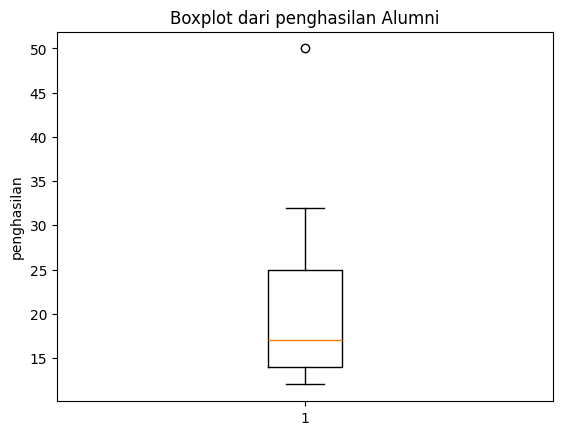

In [69]:
# Mengecek outlier dengan melihat distribusi dari variabel kontinu
# Menghitung Q1 dan Q3
# Convert 'penghasilan' column to numeric, handling errors
df['penghasilan'] = pd.to_numeric(df['penghasilan'], errors='coerce')

# Drop rows with invalid 'penghasilan' values (introduced by errors='coerce')
df_no_no = df.dropna(subset=['penghasilan'])

Q1 = df_no_no['penghasilan'].quantile(0.25)
Q3 = df_no_no['penghasilan'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5* IQR

bukan_outlier = (df_no_no["penghasilan"] >= Q1 - 1.5 * IQR) & (df_no_no["penghasilan"] <= Q3 + 1.5*IQR)

# BUat DataFrame tanpa outlier
df_bukan_outlier = df_no_no[bukan_outlier]

# Creating DataFrame With Outliers
df_outlier = df_no_no[~bukan_outlier]

# Menampilkan hasil
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutliers:")
print(bukan_outlier)

# Membuat boxplot
plt.boxplot(df_outlier['penghasilan'])
plt.title("Boxplot dari penghasilan Alumni")
plt.ylabel("penghasilan")
plt.show()


Dari grafik terdapat outlier dengan penghasilan 50 juta, karena outlier merupakan nilai berharga dari variabel "penghasilan" maka kita abaikan.

In [70]:
# menampilkan data outlier
df_outlier

,timestamp,nim,tahun masuk uin jakarta,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status saat ini,tahun wirausaha,bidang wirausaha,perusahaan,posisi,penghasilan,universitas lanjutan,tahun masuk studi lanjut,prodi lanjutan,kesesuaian kurikulum,kesesuaian bidang ilmu,saran,prodi
16,2024-06-26 14:43:08,17,2008,2013,Februari,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,None,Compliance APU PPT Senior Associate,12.0,None,None,None,3,3,banyak sekali ilmu dan pengalaman dari bapak d...,Kimia
39,2024-06-26 17:43:43,40,2008,2012,Februari,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,PT. DKSH Indonesia,Manager Technical Lab,25.0,None,None,None,4,4,Kurikulum di kuliah baik teori maupun praktek ...,Kimia
50,2024-06-26 19:03:11,51,2021,2023,Agustus,Tidak berencana mencari pekerjaan,ASN/PNS,NaN,None,Kementerian Pertanian,Koodinator Kelompok Subtansi Kelembagaan Pembi...,15.0,None,None,None,3,4,Penyesuaian kurikulum sejalan dengan perkemban...,MAG
88,2024-06-28 15:36:57,89,2006,2010,Mei,3-6 Bulan,Karyawan Swasta,NaN,None,PT. Aladin Bank Syariah,ETL Developer,18.0,None,None,None,4,3,Lebih banyak praktik lapangan,Matematika
101,2024-06-28 17:16:33,102,2005,2011,Februari,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,Medco Energi,Electrical &Instrument Inspector,32.0,None,None,None,4,4,Pembahasan nilai bahasa dan konsep teknik yang...,Fisika
116,2024-06-28 18:36:29,117,2014,2018,Mei,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,PT MEGA CAPITAL SEKURITAS,Act Equity Coordinator,12.0,None,None,None,2,2,None,Fisika
119,2024-06-28 19:32:48,120,2009,2013,November,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,Siemens Energy Indonesia,Automation Engineer,15.0,None,None,None,4,4,Lebih banyak mata kuliah / praktikum yang lebi...,Fisika
175,2024-06-29 13:22:23,176,2019,2023,November,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,DiMuto.io,Automated QA Engineer,14.0,None,None,None,3,4,Kurikulum kurang update dan ketinggalan,Teknik Informatika
185,2024-06-29 14:27:23,186,2016,2023,Agustus,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,PT. Grab Teknologi Indonesia,Software Engineer (iOS),17.0,None,None,None,3,5,None,Teknik Informatika
222,2024-07-02 08:28:56,223,2016,2021,Juni,Kurang dari 3 bulan.,Karyawan Swasta,NaN,None,"Dinas Perindustrian, Perdagangan, Koperasi, Us...",Staff,12.0,None,None,None,5,5,Terimakasih UIN Jakarta,Biologi


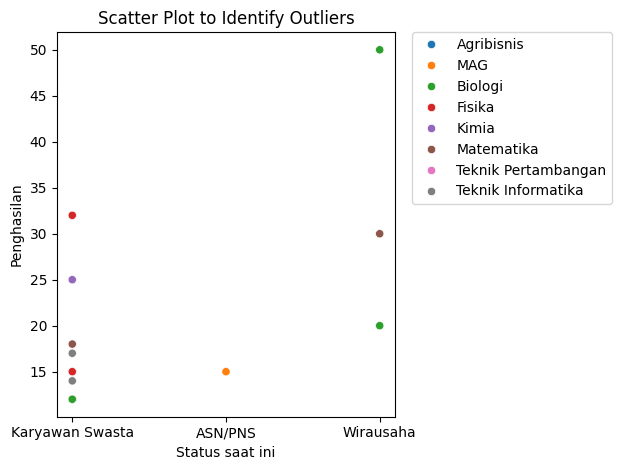

In [71]:
# Scatter plot using seaborn with 'hue'
sns.scatterplot(x='status saat ini', y='penghasilan', hue='prodi', data=df_outlier)

# Label axis
plt.xlabel('Status saat ini')
plt.ylabel('Penghasilan')
plt.title('Scatter Plot to Identify Outliers')

# Posisikan legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Tampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


Dari grafik yang berisi data outlier, terdapat 3 status pekerjaan dengan penghasilan tertinggi yaitu: Karyawan Swasta, ASN/PNS, dan Wirausaha

## Missing Values

In [72]:
# cek mv
df.isnull().sum()

,0
timestamp,0
nim,0
tahun masuk uin jakarta,0
tahun wisuda,0
bulan wisuda,0
waktu mendapatkan pekerjaan,0
status saat ini,12
tahun wirausaha,402
bidang wirausaha,400
perusahaan,213


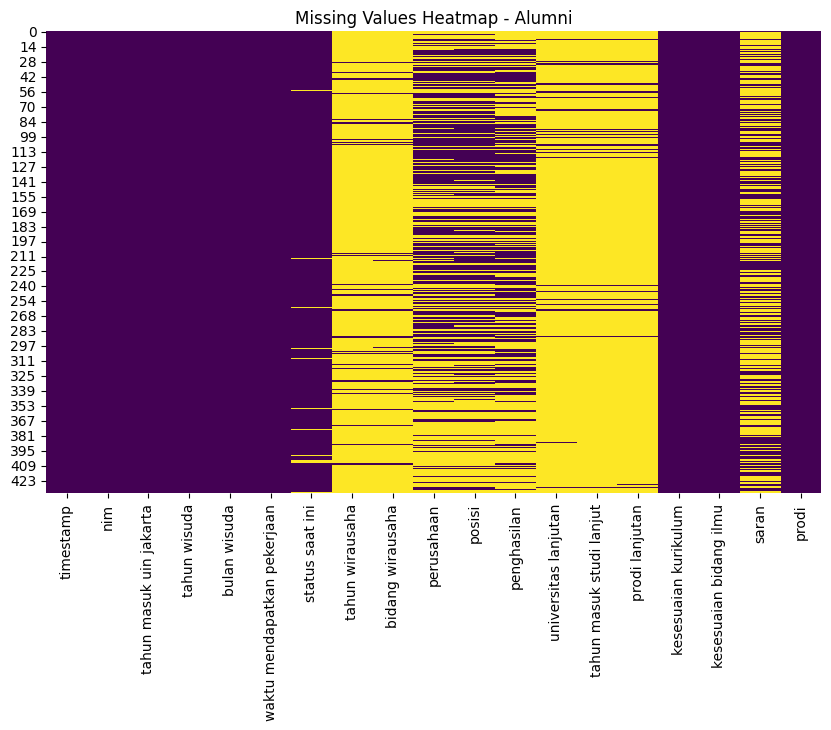

In [73]:
# Visualisasi Missing Value
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Alumni')
plt.show()

Dari grafik di atas banyak terdapat missing values di beberapa variabel, namun tidak dihapus missing values tersebut karena masih dibutuhkan untuk analisis lebih lanjut.

In [74]:
# Membuat fungsi untuk me-replace nan, '-', '—', ' ' menjadi None
def ubah_nan(df):
    col = df.columns
    for i in col:
        df[i] = df[i].replace([np.nan, '-', '—', ' '], None)

In [75]:
ubah_nan(df)

In [76]:
cekdf(df)


 timestamp
<DatetimeArray>
['2024-07-03 08:09:53', '2024-06-04 11:27:37', '2024-06-04 11:28:30',
 '2024-06-04 11:28:54', '2024-06-04 11:29:03', '2024-06-04 11:30:08',
 '2024-06-04 11:30:53', '2024-06-04 11:34:16', '2024-06-04 12:04:35',
 '2024-06-04 12:07:40',
 ...
 '2024-08-28 12:47:59', '2024-08-28 14:16:03', '2024-08-28 14:34:01',
 '2024-09-06 08:22:48', '2024-09-08 21:40:47', '2024-09-11 13:28:49',
 '2024-09-18 15:07:09', '2024-10-14 14:49:49', '2024-10-15 14:43:58',
 '2024-10-18 12:32:04']
Length: 432, dtype: datetime64[ns]

 nim
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114

<ipython-input-77-f424148aeb9a>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong


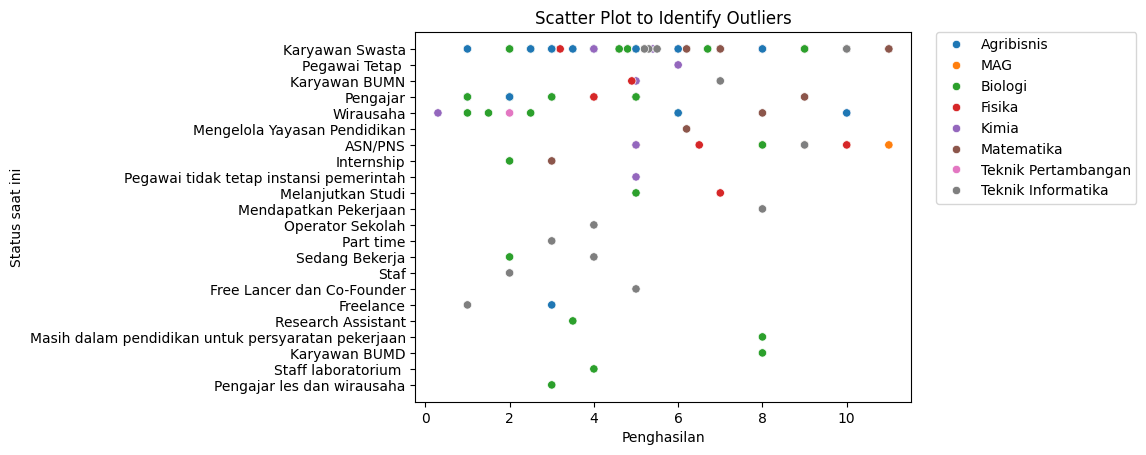

In [77]:
# Scatter plot using seaborn with 'hue'
sns.scatterplot(x='penghasilan', y='status saat ini', hue='prodi', data=df_bukan_outlier)

# Label axis
plt.xlabel('Penghasilan')
plt.ylabel('Status saat ini')
plt.title('Scatter Plot to Identify Outliers')

# Posisikan legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Tampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


Dari grafik tanpa outlier persebaran alumni kebanyakan bekerja menjadi karyawan swasta.

In [78]:
df['penghasilan'] = df['penghasilan'].astype('float64') # merubah tipe data penghasilan

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 434
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    432 non-null    datetime64[ns]
 1   nim                          432 non-null    int64         
 2   tahun masuk uin jakarta      432 non-null    category      
 3   tahun wisuda                 432 non-null    category      
 4   bulan wisuda                 432 non-null    category      
 5   waktu mendapatkan pekerjaan  432 non-null    category      
 6   status saat ini              420 non-null    object        
 7   tahun wirausaha              30 non-null     category      
 8   bidang wirausaha             32 non-null     object        
 9   perusahaan                   219 non-null    object        
 10  posisi                       223 non-null    object        
 11  penghasilan                  202 non-null    float

## Membuat variabel 'status bekerja'

In [80]:
df['status saat ini'].unique()

array(['Melamar Pekerjaan', 'Karyawan Swasta', 'Pengajar', 'ASN/PNS',
       'Karyawan BUMN', 'Pegawai Tetap ', 'Melanjutkan Studi',
       'Wirausaha', 'Mengelola Yayasan Pendidikan', None, 'Internship',
       'Mengurus Rumah Tangga', 'Mendaftar studi magister',
       'Pegawai tidak tetap instansi pemerintah', 'Mendapatkan Pekerjaan',
       'Operator Sekolah', 'Part time', 'Sedang Bekerja', 'Staf',
       'Free Lancer dan Co-Founder', 'Freelance', 'Research Assistant',
       'Masih dalam pendidikan untuk persyaratan pekerjaan', 'internship',
       'mengikuti pelatihan', 'Karyawan BUMD', 'Menganggur',
       'Staff laboratorium ', 'Pengajar les dan wirausaha', 'Internship ',
       'Proses Wisuda', 'Mahasiswa', 'Karyawan ',
       'Akan mencari pekerjaan', 'Content Creator',
       'Belum mendapat pekerjaan'], dtype=object)

In [81]:
# Definisikan kondisi-kondisi berdasarkan data yang ada
conditions = [
        df['status saat ini'].isin([
        'Mengurus Rumah Tangga', 'Menganggur', 'Proses Wisuda'
    ]),  # Kondisi untuk 'tidak bekerja'

    df['status saat ini'].isin([
        'Melamar Pekerjaan', 'Akan mencari pekerjaan', 'Belum mendapat pekerjaan'
    ]),  # Kondisi untuk 'belum bekerja'

    df['status saat ini'].isin([
        'Karyawan Swasta', 'Pengajar', 'ASN/PNS', 'Karyawan BUMN', 'Pegawai Tetap ',
        'Wirausaha', 'Mengelola Yayasan Pendidikan', 'Internship', 'internship', 'Internship ', 'Pegawai tidak tetap instansi pemerintah',
        'Mendapatkan Pekerjaan', 'Operator Sekolah', 'Part time', 'Sedang Bekerja', 'Staf',
        'Free Lancer dan Co-Founder', 'Freelance', 'Research Assistant',
        'Karyawan BUMD', 'Staff laboratorium ', 'Pengajar les dan wirausaha',
        'Karyawan ', 'Content Creator', 'Masih dalam pendidikan untuk persyaratan pekerjaan'
    ]),  # Kondisi untuk 'sedang bekerja'

    df['status saat ini'].isin([
        'Melanjutkan Studi', 'Mendaftar studi magister',
        'Mahasiswa', 'mengikuti pelatihan'
    ])  # Kondisi untuk 'melanjutkan studi'
]

# Definisikan nilai yang akan diisi sesuai kondisi
choices = ['tidak bekerja', 'belum bekerja', 'sedang bekerja', 'melanjutkan studi']

# Membuat kolom baru 'status bekerja'
# Untuk status saat ini None, masuk nilai default 'tidak diketahui'
df['status bekerja'] = np.select(conditions, choices, default='tidak diketahui')

# Menampilkan hasil
print(df[['status saat ini', 'status bekerja']])

       status saat ini   status bekerja
0    Melamar Pekerjaan    belum bekerja
1    Melamar Pekerjaan    belum bekerja
2      Karyawan Swasta   sedang bekerja
3    Melamar Pekerjaan    belum bekerja
4    Melamar Pekerjaan    belum bekerja
..                 ...              ...
430    Karyawan Swasta   sedang bekerja
431    Karyawan Swasta   sedang bekerja
432  Melamar Pekerjaan    belum bekerja
433  Melamar Pekerjaan    belum bekerja
434               None  tidak diketahui

[432 rows x 2 columns]


In [82]:
df['status bekerja'].unique()

array(['belum bekerja', 'sedang bekerja', 'melanjutkan studi',
       'tidak diketahui', 'tidak bekerja'], dtype=object)

In [83]:
df['status bekerja'].value_counts()

,count
status bekerja,
sedang bekerja,258
belum bekerja,133
melanjutkan studi,19
tidak diketahui,12
tidak bekerja,10


## Membuat variabel 'lama studi'

In [84]:
# Buat salinan sementara kolom tahun masuk dan tahun wisuda dalam bentuk int
tahun_masuk_int = df['tahun masuk uin jakarta'].astype(int)
tahun_wisuda_int = df['tahun wisuda'].astype(int)

# Buat kolom baru 'lama studi' berdasarkan pengurangan tahun wisuda dengan tahun masuk
df['lama studi'] = tahun_wisuda_int - tahun_masuk_int

# Tampilkan hasil tanpa mengubah tipe asli category
print(df[['tahun masuk uin jakarta', 'tahun wisuda', 'lama studi']])


    tahun masuk uin jakarta tahun wisuda  lama studi
0                      2019         2023           4
1                      2018         2024           6
2                      2018         2024           6
3                      2017         2024           7
4                      2019         2024           5
..                      ...          ...         ...
430                    2020         2024           4
431                    2019         2024           5
432                    2020         2024           4
433                    2020         2024           4
434                    2020         2025           5

[432 rows x 3 columns]


## Membuat variabel 'nama bulan'

In [85]:
df['timestamp'].value_counts()

,count
timestamp,
2024-07-03 08:09:53,1
2024-07-03 09:24:37,1
2024-07-05 14:20:18,1
2024-07-05 09:59:13,1
2024-07-04 11:21:48,1
...,...
2024-06-29 12:17:58,1
2024-06-29 12:17:36,1
2024-06-29 12:17:17,1


In [86]:
# Ekstrak nama bulan dari kolom 'timestamp'
df['nama_bulan'] = df['timestamp'].dt.strftime('%B')

# Memeriksa nama bulan apa saja yang ada dalam data
nama_bulan_unik = df['nama_bulan'].unique()

# Tampilkan nama bulan-bulan yang terdapat pada data
print(nama_bulan_unik)


['July' 'June' 'August' 'September' 'October']


In [87]:
df['nama_bulan'].value_counts()

,count
nama_bulan,
June,208
July,157
August,60
September,4
October,3


Berdasarkan data, kebanyakan alumni mengisi gform pada bulan Juni dan Juli.
Bisa didapat insight untuk menyebarkan gform di dua bulan tersebut agar arsip alumni lebih banyak.

# EDA

## EDA Univariate

###Grafik Tahun wisuda, Waktu mendapatkan pekerjaan, dan Tahun wirausaha

<ipython-input-88-a9b5de81e420>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(column)[column].count().reset_index(name='count')
<ipython-input-88-a9b5de81e420>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(y=column, x='count', data=grouped_df, palette='inferno', ax=axes[i], ci=None)
<ipython-input-88-a9b5de81e420>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(y=column, x='count', data=grouped_df, palette='inferno', ax=axes[i], ci=None)
<ipython-input-88-a9b5de81e420>:13: FutureWarning: The default of observed=False is deprecated and

<Figure size 640x480 with 0 Axes>

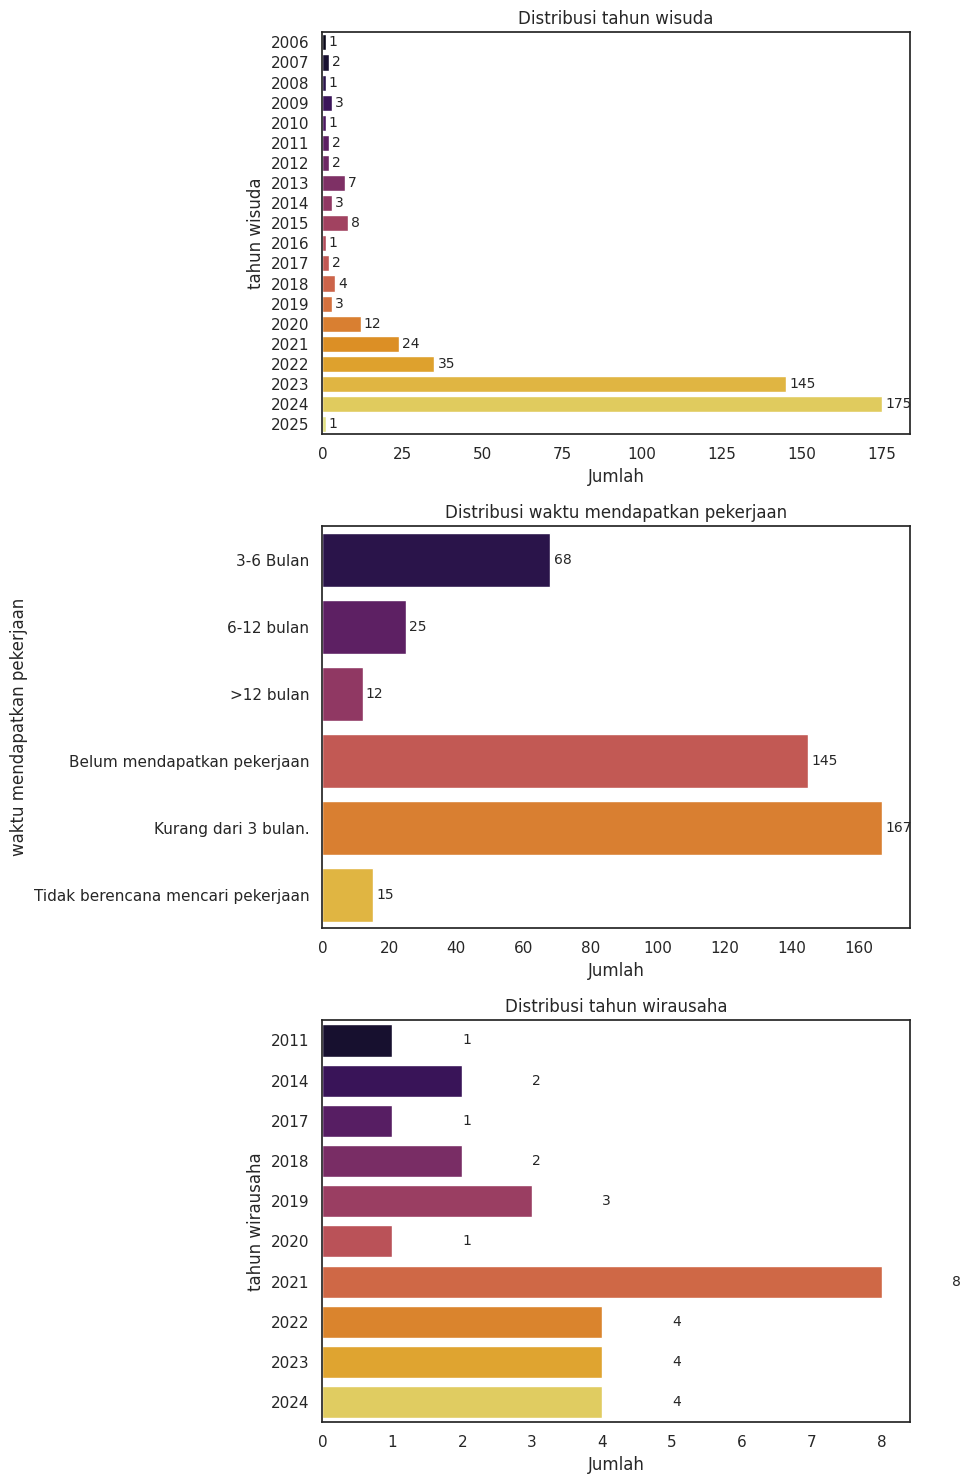

In [88]:
col_cat = ['tahun wisuda', 'waktu mendapatkan pekerjaan', 'tahun wirausaha']

# Pengaturan style seaborn
sns.set(style='white')
plt.clf()

# Membuat subplot untuk setiap kolom kategorik
fig, axes = plt.subplots(len(col_cat), 1, figsize=(10, len(col_cat) * 5))

# Iterasi setiap kolom kategorik
for i, column in enumerate(col_cat):
    # Menghitung jumlah data per kategori
    grouped_df = df.groupby(column)[column].count().reset_index(name='count')

    # Membuat bar chart
    bar_plot = sns.barplot(y=column, x='count', data=grouped_df, palette='inferno', ax=axes[i], ci=None)

    # Menambahkan jumlah di atas setiap bar
    for p in bar_plot.patches:
        bar_plot.text(
            p.get_width() + 1,            # posisi x tepat setelah ujung bar
            p.get_y() + p.get_height() / 2,  # posisi y di tengah bar
            int(p.get_width()),            # teks yang ditampilkan
            ha='left', va='center',        # alignment horizontal dan vertical
            fontsize=10                    # ukuran font
        )

    # Menambahkan judul dan label
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Jumlah')

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi yang diperoleh

*   Jumlah terbanyak yang megisi googleform alumni yaitu yang wisudanya pada tahun 2024
*   Dari semua alumni yang mengisi, sebanyak 167 responden sudah mendapat pekerjaan kurang dari 3 bulan setelah lulus
*   Alumni yang menekuni wirausaha paling banyak memulai bidang tersebut pada tahun 2021

Saran: Karena alumni 2024 terbanyak mengisi gform, gunakan data ini untuk mengevaluasi kebutuhan mereka dan meningkatkan layanan alumni. Dan banyak alumni mendapat pekerjaan dalam 3 bulan, fakultas dapat memperkuat dukungan karier bagi lulusan baru agar tren positif ini berlanjut. Sediakan program pendampingan wirausaha, terutama bagi alumni yang tertarik memulai usaha setelah lulus











###Grafik Alumni mengisi gform

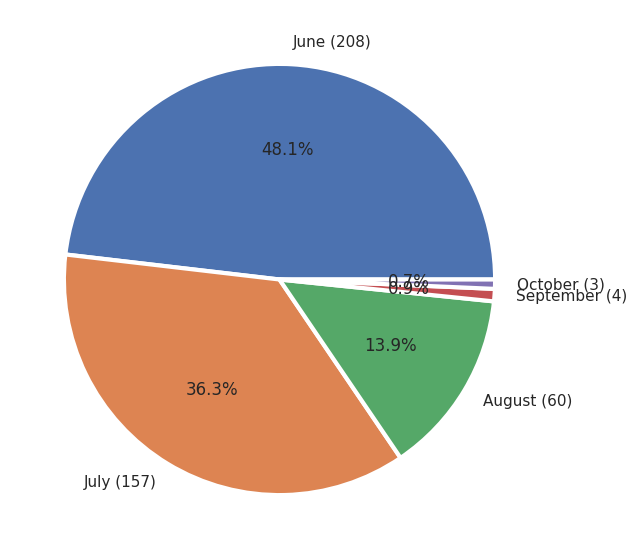

In [89]:
# Hitung jumlah dan persentase masing-masing kategori
counts = df['nama_bulan'].value_counts()
labels = [f'{label} ({count})' for label, count in zip(counts.index, counts)]

# Buat pie chart dengan persentase
fig = plt.figure(figsize=(10, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

# Show plot
plt.show()


Berdasarkan grafik didapat bahwa kebanyakan alumni mengisi gform pada bulan juni.

Saran:
Untuk fakultas bisa memberikan link gform ini pada bulan juni agar pendataan alumni lebih banyak yang isi dan lebih lengkap.

###Grafik Status Bekerja

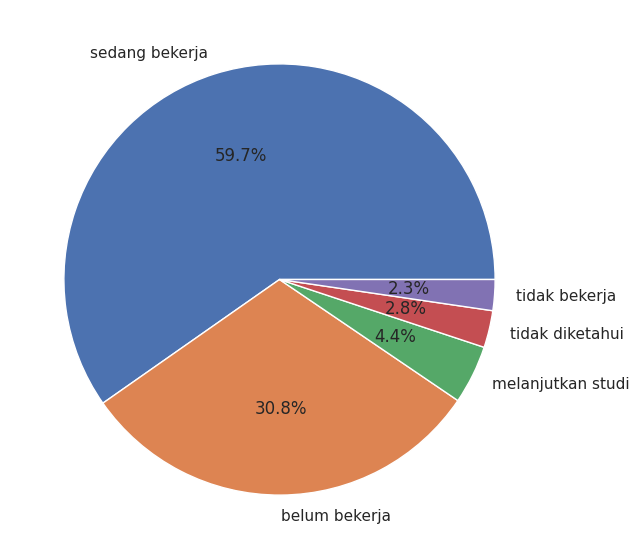

In [90]:
fig = plt.figure(figsize=(10, 7))
plt.pie(df['status bekerja'].value_counts(),
        labels=df['status bekerja'].value_counts().index,
        autopct='%1.1f%%')  # Add percentage labels

# Show plot
plt.show()


Dari grafik tersebut didapat informasi kebanyakan alumni sudah bekerja, Namun 30.8% masih belum bekerja.

Saran: Pihak fakultas bisa membuat grup alumni-alumni, sehingga antar alumni bisa memberikan informasi terkait pekerjaan yang diharapkan mengurangi tingkat pengangguran.

## EDA Multivariate dan Bivariate

### Hubungan antara Tahun Masuk dan Lama Studi Berdasarkan Status Bekerja

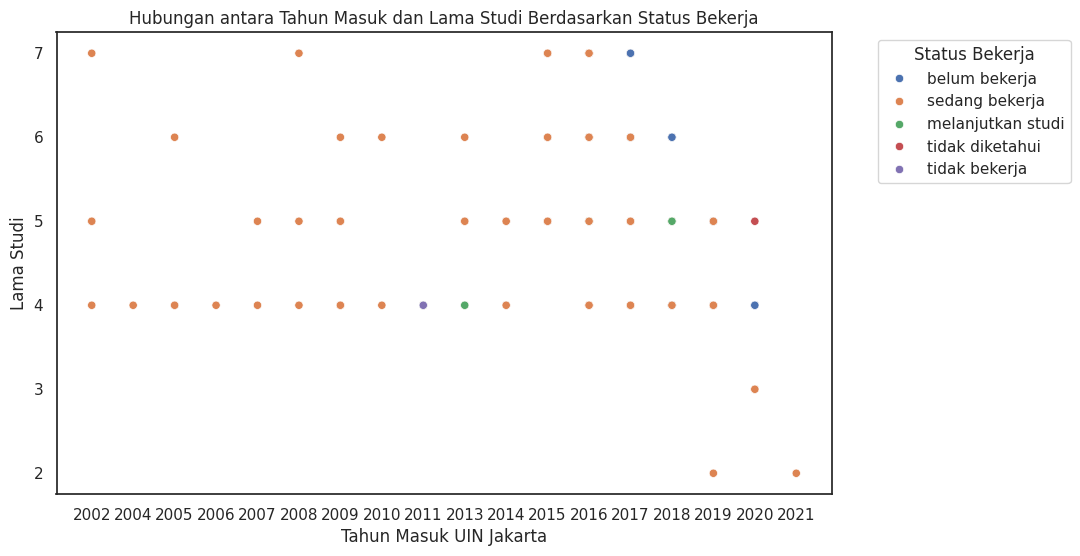

In [91]:
# Ukuran figure
plt.figure(figsize=(10, 6))

# Membuat scatter plot
sns.scatterplot(data=df, x='tahun masuk uin jakarta', y='lama studi', hue='status bekerja')

# Menambahkan judul dan label sumbu
plt.title('Hubungan antara Tahun Masuk dan Lama Studi Berdasarkan Status Bekerja')
plt.xlabel('Tahun Masuk UIN Jakarta')
plt.ylabel('Lama Studi')

# Memindahkan legenda ke luar grafik
plt.legend(title='Status Bekerja', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan grafik
plt.show()

Dari visualisasi di atas didapat:
- Tidak ada tren yang sangat jelas antara tahun masuk dan lama studi. Namun, secara umum, sebagian besar alumni menyelesaikan studi dalam waktu 4-6 tahun.
- Terdapat banyak alumni yang sedang bekerja saat ini
- Alumni dengan Tahun Masuk UIN Jakarta dari 2019 keatas rentang lama studi semakin cepat

Saran :

Karena mayoritas alumni menyelesaikan studi dalam 4-6 tahun, fakultas dapat mempertimbangkan untuk mengidentifikasi faktor-faktor yang mendukung atau menghambat waktu kelulusan. Memberikan program pembinaan atau peningkatan kurikulum dapat diberikan untuk memfasilitasi percepatan kelulusan bagi angkatan-angkatan mendatang.

### Distribusi Status Bekerja berdasarkan Lama Studi dan Kesesuaian Bidang Ilmu

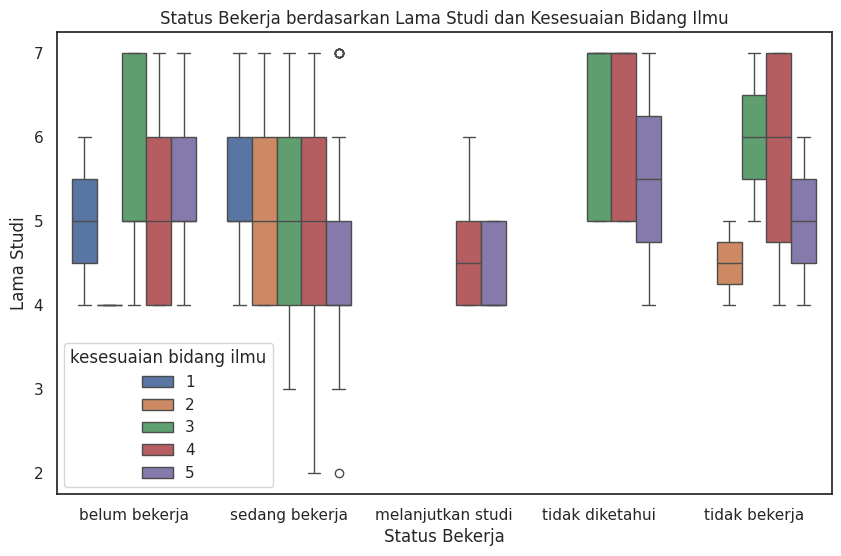

In [92]:
# Box plot untuk 'lama studi' berdasarkan 'status bekerja'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status bekerja', y='lama studi', hue='kesesuaian bidang ilmu')
plt.title('Status Bekerja berdasarkan Lama Studi dan Kesesuaian Bidang Ilmu')
plt.xlabel('Status Bekerja')
plt.ylabel('Lama Studi')
plt.show()


Dari visualisasi di atas didapat:
- Alumni yang belum bekerja memiliki lama studi dalam rentang 4-7 tahun dengan kesesuaian bidang ilmu pada angka 3, yang menunjukkan bahwa kesesuaian tersebut cukup sesuai.

- Alumni yang sedang bekerja umumnya memiliki lama studi dalam rentang 4-6 tahun. Namun, terdapat beberapa alumni yang berada di luar rentang tersebut, yaitu dengan lama studi 2 tahun dan 7 tahun, dengan kesesuaian bidang ilmu yang beragam.

- Alumni yang melanjutkan studi semua memiliki lama studi dalam rentang 4-5 tahun dengan kesesuaian bidang ilmu pada angka 4 dan 5, yang menunjukkan bahwa kesesuaian tersebut sangat sesuai.

- Alumni yang tidak bekerja menunjukkan variasi yang sangat beragam dalam lama studi mereka dengan kesesuaian bidang ilmu yang beragam.

Saran: Karena rata-rata kesesuaian bidang ilmu itu cukup sesuai dengan status bekerja maka:

- Terdapat alumni yang lulus dalam waktu 7 tahun, peningkatan bimbingan akademik dan pemantauan progres studi dapat diterapkan oleh fakultas untuk menjaga agar mahasiswa dapat lulus dalam rentang waktu ideal 4-6 tahun.

- Mengembangkan program pembekalan karier dan keterampilan untuk membantu alumni yang belum bekerja.

- Menyediakan fasilitas dan bimbingan akademik untuk mendukung alumni yang ingin melanjutkan studi.


- Mengumpulkan data lebih lanjut tentang alumni yang tidak bekerja untuk mengetahui penyebab dan memberikan solusi yang tepat.

### Distribusi Lama Studi dan Distribusi Lama Studi dengan Status Bekerja

<ipython-input-93-6914fcd51fb6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=st_age.index, y=st_age.values, palette='Wistia', ax=ax[0])


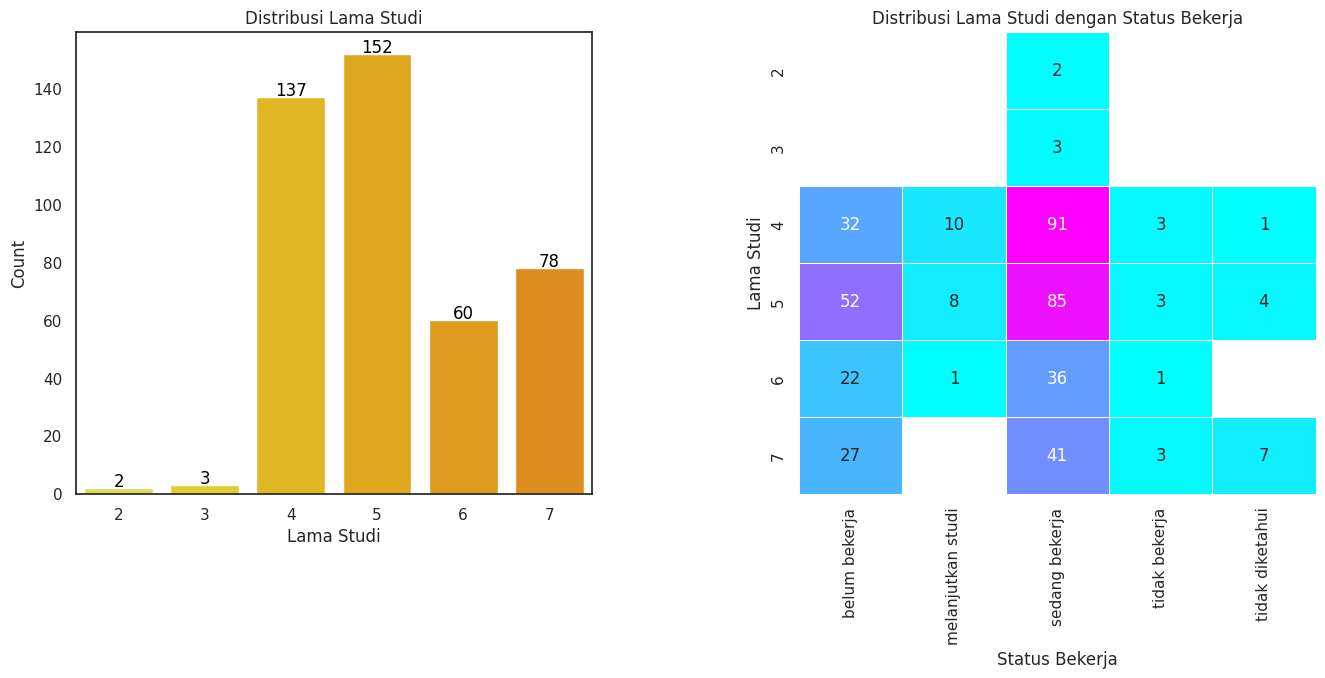

In [93]:
# Mengurutkan nilai berdasarkan indeks untuk memastikan urutan yang benar
st_age = df['lama studi'].value_counts().sort_index()

# Membuat subplot untuk bar plot dan heatmap
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot untuk 'lama studi'
sns.barplot(x=st_age.index, y=st_age.values, palette='Wistia', ax=ax[0])
ax[0].set_title('Distribusi Lama Studi')
ax[0].set_xlabel('Lama Studi')
ax[0].set_ylabel('Count')

# Menambahkan anotasi teks di dalam setiap bar secara dinamis berdasarkan tinggi bar
for i, v in enumerate(st_age.values):
    ax[0].text(i, v + 0.5, str(v), color='black', fontsize=12, ha='center')

# Membuat data pivot untuk heatmap 'lama studi' berdasarkan 'status bekerja'
foo = df.groupby(['lama studi', 'status bekerja'])['status bekerja'].count().reset_index(name='count')
foo = foo.pivot(columns='status bekerja', index='lama studi', values='count')

# Heatmap untuk distribusi 'lama studi' berdasarkan 'status bekerja'
sns.heatmap(foo, annot=True, fmt='.0f', linewidths=.5, cmap='cool', cbar=False, ax=ax[1])
ax[1].set_title('Distribusi Lama Studi dengan Status Bekerja')
ax[1].set_xlabel('Status Bekerja')
ax[1].set_ylabel('Lama Studi')

# Mengatur jarak antar subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan plot
plt.show()


Dari Visualisasi di atas didapat:
- Alumni dengan lama studi terbanyak adalah 5 tahun, dengan total 152 alumni, terdiri dari:

 52 alumni belum bekerja

 8 alumni melanjutkan studi

 85 alumni sedang bekerja

 3 alumni tidak bekerja

 4 alumni dengan status tidak diketahui

- Alumni dengan lama studi paling sedikit adalah 2 tahun, dengan total 2 alumni, dan keduanya sedang bekerja.

Saran:

Dengan banyaknya alumni yang belum bekerja setelah 5 tahun studi, prodi dan fakultas dapat memperkuat program persiapan karier, termasuk pelatihan keterampilan profesional, networking, dan bimbingan karier khusus bagi mahasiswa tingkat akhir.

### Hubungan antara Lama studi dan waktu mendapatkan pekerjaan berdasarkan Prodi

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.0% of the points cannot be place

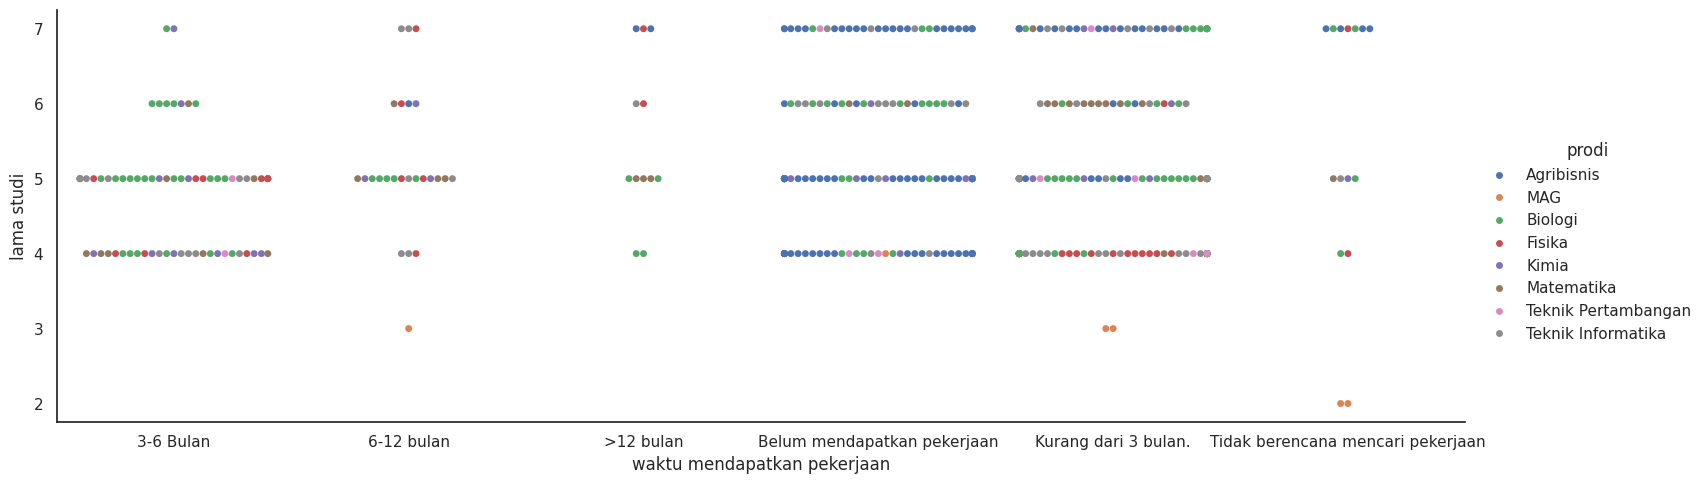

In [94]:
p = sns.catplot(
    x="waktu mendapatkan pekerjaan",
    y="lama studi",
    hue="prodi",
    kind="swarm",
    data=df,
    aspect=3  # Memperlebar sumbu x
)


Dari visualisasi di atas kita dapat informasi bahwa:
1. Rata-rata  lama studi paling tinggi ada pada, Prodi Agribisnis. Dan dari Prodi Agribisnis sendiri banyak terdata pada status mendapatkan pekerjaan nya yaitu, rata-rata banyak yang belum mendapat pekerjaan.
2. Prodi lainnya sangat variatif dalam waktu mendapatkan pekerjaan dan lama studinya.
3. Lulusan Program studi magister agribisnis, rata- rata mendapatkan pekerjaan kurang dari satu tahun dan ada juga yang tidak berencana mencari pekerjaan, bisa jadi berminat melanjutkan studi nya kembali seperti ke S3.

Saran:

- Karena banyak lulusan Agribisnis yang belum bekerja, perlu ada program pembekalan karier khusus, seperti workshop, magang, dan jejaring industri.

- Menyediakan program pendampingan untuk lulusan magister Agribisnis yang ingin melanjutkan studi ke S3, serta fasilitasi jaringan akademik atau riset yang mendukung.

### Hubungan Status Bekerja berdasarkan Prodi

<ipython-input-95-fe8e12b0314f>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(["status bekerja", "prodi"]).size().unstack()


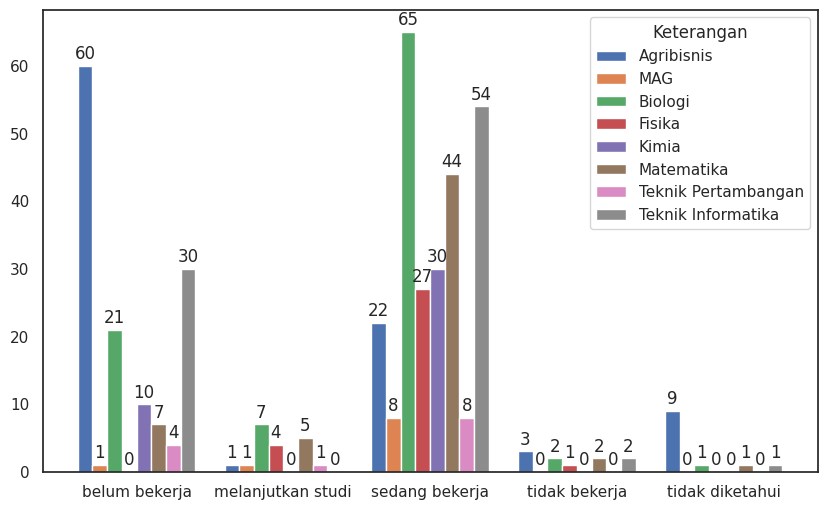

In [95]:
# Menambahkan fungsi groupedbarplot
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1. / n
    pos = (np.linspace(w / 2., 1 - w / 2., n) - 0.5) * width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df)) + x, df[col].values, width=w, **kw))
        for val, xi in zip(df[col].values, np.arange(len(df)) + x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0, 2),
                            textcoords="offset points",
                            ha="center", va="bottom")

    # Menambahkan legend sesuai kolom
    ax.legend([bar[0] for bar in bars], df.columns, title="Keterangan")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

# Data contoh untuk plot
counts = df.groupby(["status bekerja", "prodi"]).size().unstack()
plt.figure(figsize=(10, 6))

# Memanggil groupedbarplot dan menampilkan grafik
groupedbarplot(counts)
plt.show()


Dari visualisasi diatas kita dapat informasi bahwa :

1. Status "belum bekerja" paling banyak pada lulusan prodi Agribisnis, dan paling rendah atau bahkan tidak ada yaitu Alumni lulusan prodi Fisika
2.  Status "Melanjutkan Studi" paling banyak terdapat pada Alumni lulusan prodi Biologi.
3. Status "Sedang bekerja" paling banyak terdapat pada Alumni lulusan prodi Biologi, dan terendah nya terdapat pada Alumni lulusan prodi MAG dan Teknik Pertambangan.
4. Status "Tidak Bekerja" terdapat pada Alumni lulusan prodi Agribisnis.
5. Status yang "tidak diketahui" paling banyak terdapat pada Alumni lulusan prodi Agribisnis.

Saran:

- Meningkatkan program pembekalan karier untuk lulusan Agribisnis, seperti pelatihan keterampilan, magang, dan kerja sama industri.

- Lalu dukungan Studi Lanjut di Prodi Biologi
Perkuat dukungan riset dan bimbingan bagi lulusan Biologi yang ingin melanjutkan studi, melalui kolaborasi penelitian dan pelatihan publikasi.

- Fakultas dapat meningkatkan pendampingan karier untuk lulusan MAG dan Teknik Pertambangan, karena jumlah alumni yang bekerja relatif rendah.

### Hubungan lama studi alumni untuk setiap program studi.

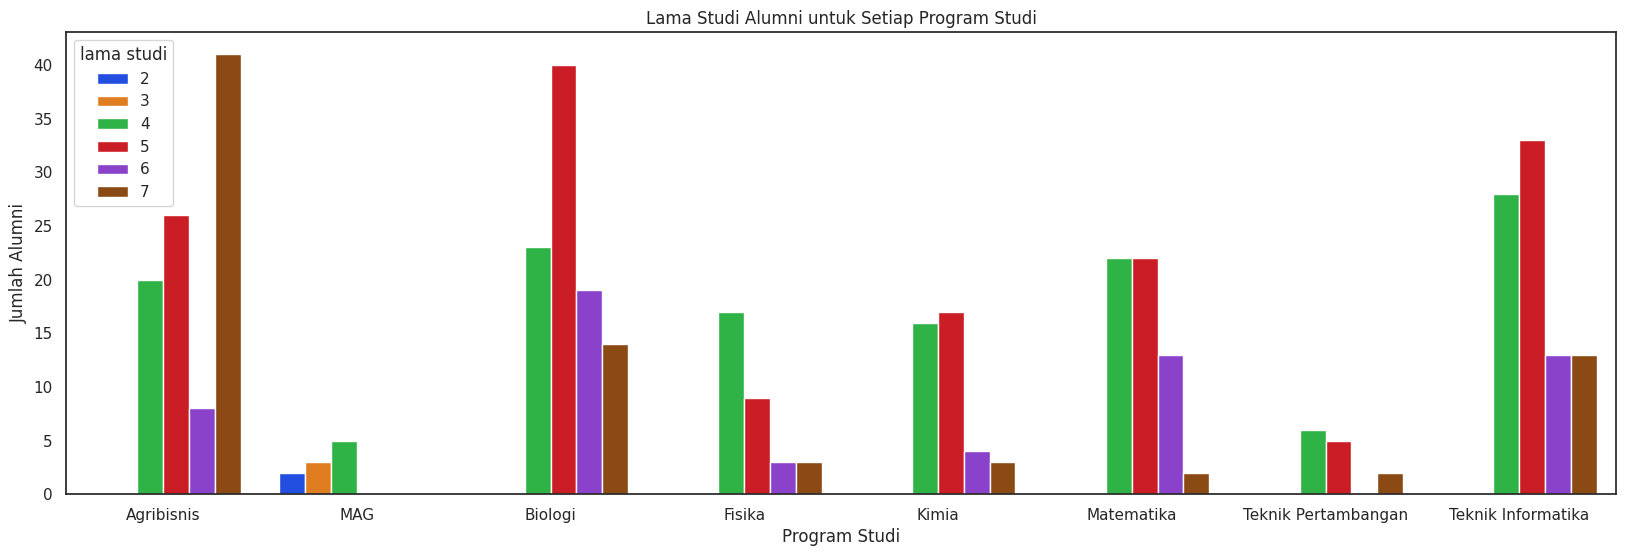

In [96]:
# Mengatur ukuran plot
plt.figure(figsize=(20, 6))

# Membuat countplot dengan palet warna kontras
sns.countplot(data=df, x='prodi', hue='lama studi', palette='bright')

# Menambahkan judul dan label sumbu
plt.title('Lama Studi Alumni untuk Setiap Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Alumni')

# Menampilkan plot
plt.show()


Berdasarkan grafik diatas terlihat bahwa:


* Untuk lama studi program s1 di FST berada diantara 4 s.d. 7 tahun dan untuk program s2 (magister agribisnis) diantara 2 s.d. 4 tahun
* Program studi agribisnis s1 memiliki alumni dengan lama studi selama 7 tahun terbanyak diantara program studi lainnya dan program studi teknik informatika memiliki alumni dengan lama studi selama 4 tahun terbanyak diantara program studi lainnya.

Saran: untuk prodi yang memiliki alumni dengan lama studi 6 s.d. 7 tahun untuk mengevaluasi faktor-faktor yang dapat menghambat mahasiswa untuk lulus tepat waktu, serta memotivasi mahasiswsa untuk lulus tepat waktu.


### Hubungan waktu mendapatkan pekerjaan berdasarkan prodi

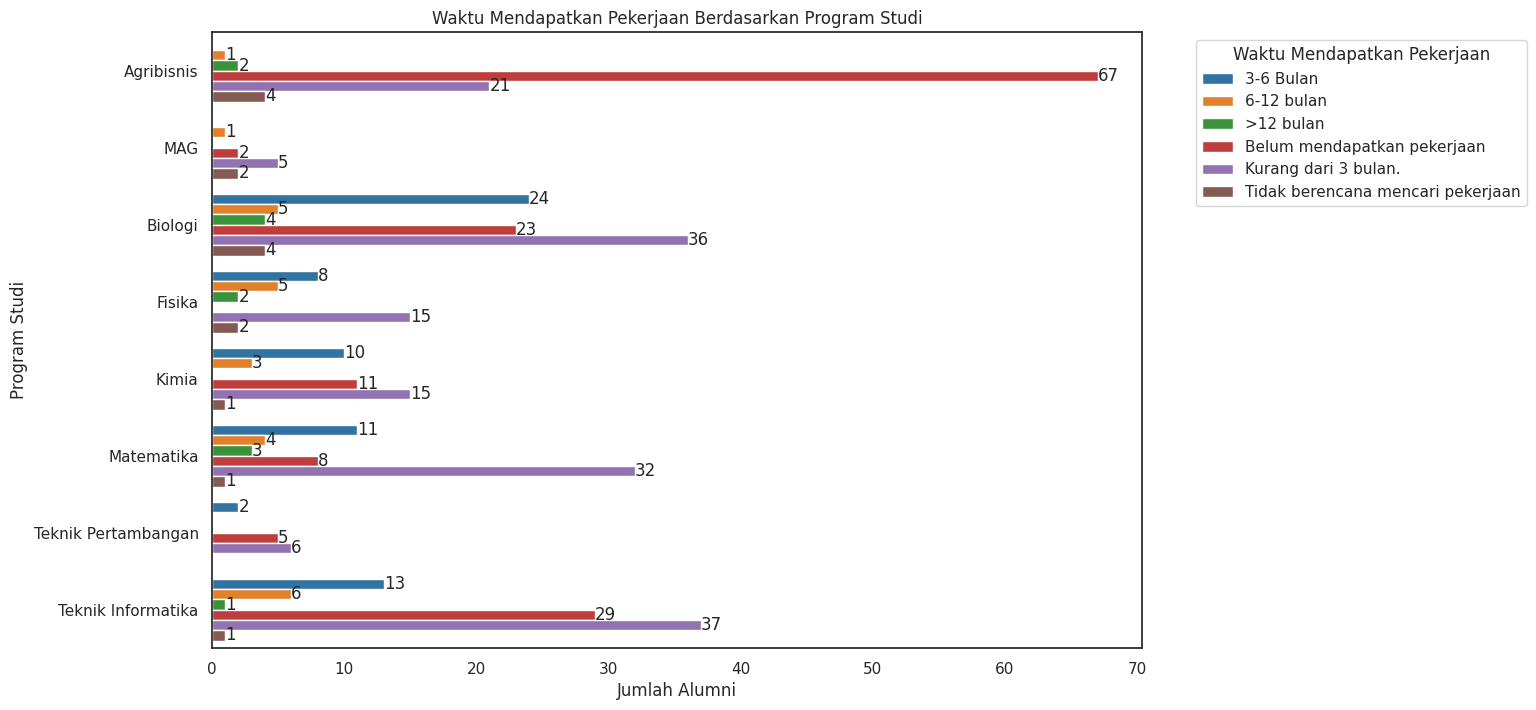

In [97]:
# Set up the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, y='prodi', hue='waktu mendapatkan pekerjaan', palette="tab10")

# Add counts above each bar
for container in ax.containers:
    ax.bar_label(container)

# Add plot title and labels
plt.title('Waktu Mendapatkan Pekerjaan Berdasarkan Program Studi')
plt.xlabel('Jumlah Alumni')
plt.ylabel('Program Studi')
plt.legend(title='Waktu Mendapatkan Pekerjaan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Dari grafik tersebut didapat informasi:
1. 3 prodi paling cepat mendapatkan pekerjaan (kurang dari 3 bulan) yaitu prodi Teknik Informatika (37 orang), Biologi (36 orang), dan Matematika (32 orang).
2. Alumni prodi paling banyak yang belum mendapatkan pekerjaan yaitu dari prodi Agribisnis (67 orang).

Saran:

Prodi Agribisnis dapat meningkatkan program pembekalan karier, seperti magang dan kerja sama industri, untuk membantu lulusan yang belum bekerja. Sementara itu, prodi Teknik Informatika, Biologi, dan Matematika yang sudah berhasil mempercepat masa tunggu kerja dapat memperkuat jaringan industri dan pelatihan soft skills.

### Hubungan Rata-rata Penghasilan Berdasarkan Lama Studi

In [98]:
# Menggabungkan variabel 'lama studi' ke df_bukan_outlier
if 'lama studi' in df.columns:
    # Gabungkan kolom 'lama studi' ke dalam df_bukan_outlier
    df_bukan_outlier = df_bukan_outlier.merge(df[['lama studi']], left_index=True, right_index=True, how='left')
else:
    print("Kolom 'lama studi' tidak ditemukan dalam DataFrame asli.")


<ipython-input-99-8b7053f28ad1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lama studi', y='penghasilan', data=df_bukan_outlier, palette="Set1", estimator='mean')


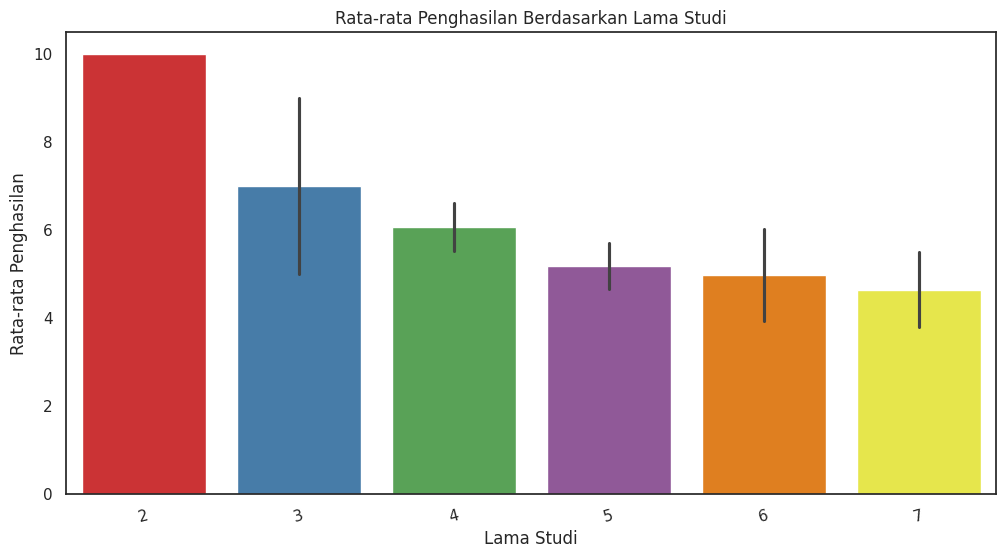

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(x='lama studi', y='penghasilan', data=df_bukan_outlier, palette="Set1", estimator='mean')
plt.title('Rata-rata Penghasilan Berdasarkan Lama Studi')
plt.xlabel('Lama Studi')
plt.ylabel('Rata-rata Penghasilan')
plt.xticks(rotation=15)
plt.show()


Berdasarkan grafik tersebut didapatkan informasi bahwa semakin singkat lama studi, maka rata-rata penghasilan juga tinggi.

Saran: Fakultas dapat mempertimbangkan program akselerasi bagi mahasiswa yang siap menyelesaikan studi lebih cepat, untuk meningkatkan daya saing lulusan di pasar kerja.

### Hubungan Penghasilan Berdasarkan Bidang Pekerjaan

<ipython-input-100-d7b817024561>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='status saat ini', y='penghasilan', data=df_outlier, palette="tab10", alpha=0.6)


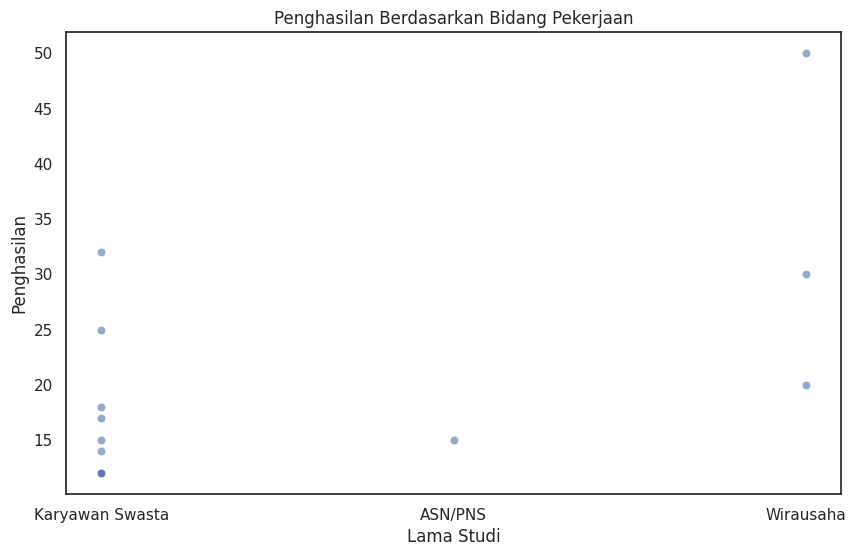

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='status saat ini', y='penghasilan', data=df_outlier, palette="tab10", alpha=0.6)
plt.title('Penghasilan Berdasarkan Bidang Pekerjaan')
plt.xlabel('Lama Studi')
plt.ylabel('Penghasilan')
plt.show()

Berdasarkan grafik tersebut didapat informasi bahwa 3 pekerjaan dengan gaji tertinggi adalah karyawan swasta, ASN/PNS, dan wirausaha. Dari informasi tersebut,

Saran:

Pihak fakultas bisa membuatkan grup alumni yang bidang pekerjaannya 3 posisi tersebut, sehingga bisa membantu lulusan baru yang ingin bekerja pada posisi tersebut.

### Hubungan Penghasilan berdasarkan prodi

<ipython-input-101-bc5bc704e747>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prodi', y='penghasilan', data=df_bukan_outlier, palette="Set2", estimator='mean')


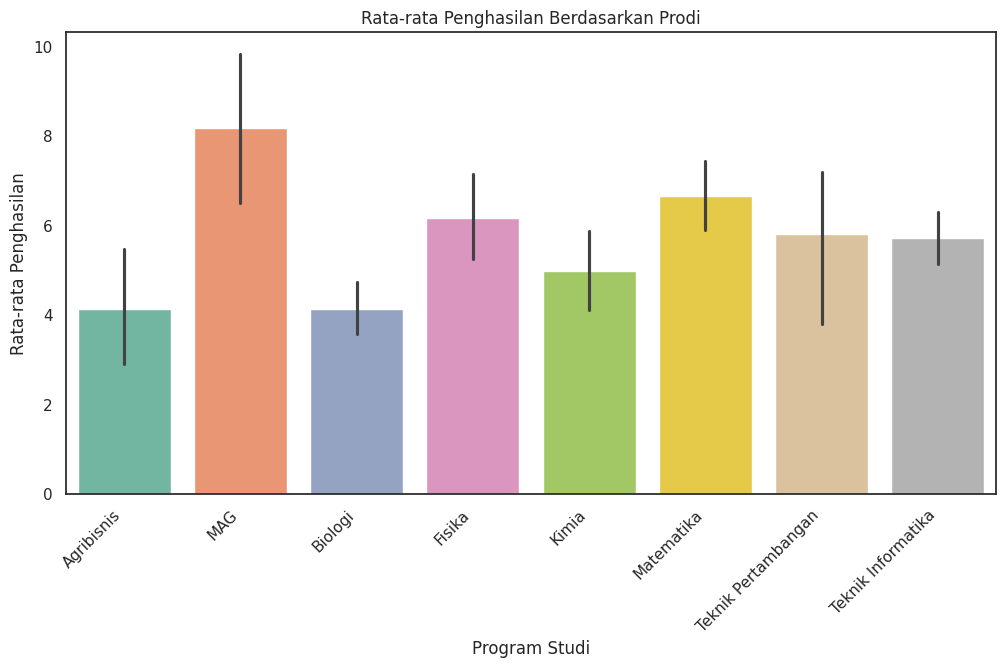

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x='prodi', y='penghasilan', data=df_bukan_outlier, palette="Set2", estimator='mean')
plt.title('Rata-rata Penghasilan Berdasarkan Prodi')
plt.xlabel('Program Studi')
plt.ylabel('Rata-rata Penghasilan')
plt.xticks(rotation=45, ha='right')  # Memiringkan label prodi untuk keterbacaan
plt.show()

Berdasarkan grafik tersebut didapat informasi bahwa gaji dari prodi Master Agribisnis memiliki gaji tertinggi karena lulusannya sudah S2, dikuti prodi Matematika pada urutan kedua.

Saran:
Karena penghasilan lulusan S2 Agribisnis, kampus dan fakultas dapat memperkuat program pasca sarjana lainnya untuk membuka peluang peningkatan karier dan gaji bagi lulusan program lain. Lalu menyediakan program pelatihan khusus dan jejaring industri bagi lulusan Matematika agar mereka lebih siap bersaing di pasar kerja dan mencapai potensi penghasilan yang lebih tinggi.

### Hubungan Kesesuaian Bidang Ilmu berdasarkan Prodi

<ipython-input-102-7a28dba156c5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kesesuaian_counts = df.groupby(['prodi', 'kesesuaian bidang ilmu']).size().unstack()


<Figure size 1200x600 with 0 Axes>

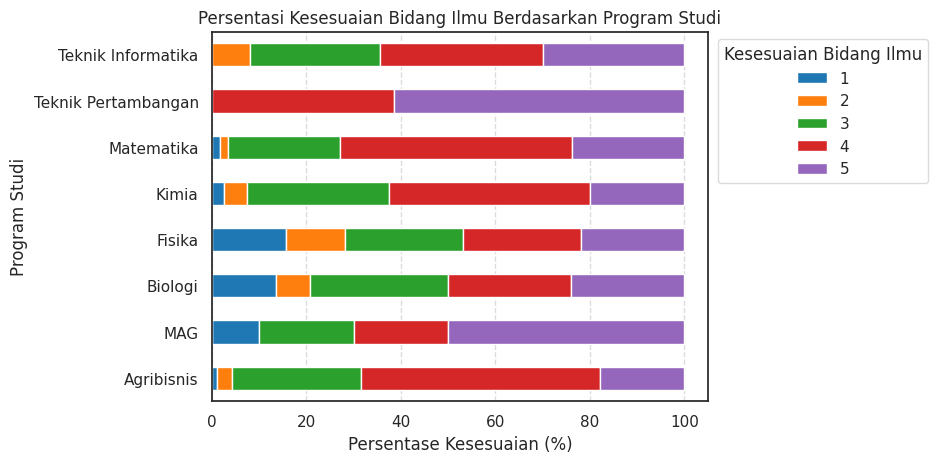

In [102]:
# Menghitung persentase kesesuaian pekerjaan per program studi
kesesuaian_counts = df.groupby(['prodi', 'kesesuaian bidang ilmu']).size().unstack()
kesesuaian_percentage = (kesesuaian_counts.div(kesesuaian_counts.sum(axis=1), axis=0) * 100)

# Membuat palet warna
colors = sns.color_palette("tab10", kesesuaian_percentage.shape[1])  # Pilih warna berdasarkan jumlah kolom

# Membuat bar plot dengan warna berbeda
plt.figure(figsize=(12, 6))
kesesuaian_percentage.plot(kind='barh', stacked=True, color=colors)  # stacked=True agar batang setiap kategori terpisah
plt.title("Persentasi Kesesuaian Bidang Ilmu Berdasarkan Program Studi")
plt.xlabel("Persentase Kesesuaian (%)")
plt.ylabel("Program Studi")
plt.legend(title="Kesesuaian Bidang Ilmu", loc='upper right', bbox_to_anchor=(1.46, 1), framealpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Dari grafik didapat informasi bahwa prodi Teknik Tambang memiliki kesesuaian bidang ilmu yang sangat sesuai berdasarkan program studinya.

Saran: Karena kesesuaian bidang ilmu lulusan Teknik Tambang tinggi, fakultas dapat memperkuat kolaborasi dengan industri tambang untuk menyediakan lebih banyak peluang magang dan penempatan kerja langsung bagi lulusan.

###Hubungan Kesesuaian Kurikulum berdasarkan Prodi

<ipython-input-103-8afdd8913375>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kesesuaian_counts = df.groupby(['prodi', 'kesesuaian kurikulum']).size().unstack()


<Figure size 1200x600 with 0 Axes>

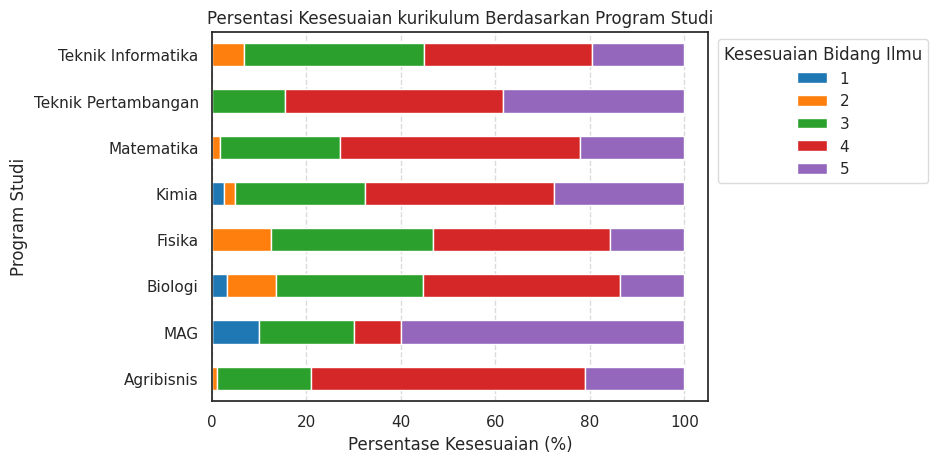

In [103]:
# Menghitung persentase kesesuaian kurikulum denagn lapangan pekerjaan yang ada berdasarkan penilaian alumni per program studi
kesesuaian_counts = df.groupby(['prodi', 'kesesuaian kurikulum']).size().unstack()
kesesuaian_percentage = (kesesuaian_counts.div(kesesuaian_counts.sum(axis=1), axis=0) * 100)

# Membuat palet warna
colors = sns.color_palette("tab10", kesesuaian_percentage.shape[1])  # Pilih warna berdasarkan jumlah kolom

# Membuat bar plot dengan warna berbeda
plt.figure(figsize=(12, 6))
kesesuaian_percentage.plot(kind='barh', stacked=True, color=colors)  # stacked=True agar batang setiap kategori terpisah
plt.title("Persentasi Kesesuaian kurikulum Berdasarkan Program Studi")
plt.xlabel("Persentase Kesesuaian (%)")
plt.ylabel("Program Studi")
plt.legend(title="Kesesuaian Bidang Ilmu", loc='upper right', bbox_to_anchor=(1.46, 1), framealpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Dari grafik terlihat bahwa sebagian besar alumni dari berbagai program studi menilai bahwa kurikulum yang ada sudah sesuai dengan kebutuhan industri. Namun demikan masih ada yang menilai bahwa kurikulum yang ada saat ini belum sesuai dengan kebutuhan lapangan pekerjaan.

Saran:
Diharapkan untuk seluruh prodi agar selalu memonitoring tren kebutuhan industri agar dapat menyesuaikan kurikulum guna membantu mempersiapkan mahasiswa yang siap bekerja di industri-industri yang sesuai dengan bidang ilmu dan membuat program - program seperti workshop dll nyang dapat membantu mahasiswa mengenal dunia pekerjaan.

## Kesimpulan



- Lama Studi dan Status Pekerjaan: Mayoritas alumni lulus dalam 4-6 tahun, tetapi prodi seperti Agribisnis cenderung punya masa studi lebih lama, dan banyak lulusannya yang belum bekerja. Fakultas bisa fokus pada upaya mempercepat kelulusan dan memberi dukungan lebih untuk persiapan karier.

- Lanjut Studi: Alumni yang melanjutkan studi rata-rata lulus S1 dalam 4-5 tahun dan kebanyakan dari prodi Biologi, menunjukkan minat tinggi dalam melanjutkan bidang studi yang sama. Fakultas bisa memberikan dukungan riset dan pelatihan publikasi untuk alumni yang ingin melanjutkan pendidikan.

- Kesesuaian Pekerjaan dengan Jurusan dan Penghasilan: Banyak alumni bekerja sesuai jurusan mereka, seperti Teknik Tambang, dan mereka yang lulus lebih cepat cenderung memiliki penghasilan lebih tinggi, terutama di S2 Agribisnis dan Matematika. Hal ini bisa menjadi pertimbangan untuk memberikan bimbingan bagi lulusan dalam memilih bidang yang sesuai.

- Pembekalan Karier: Fakultas perlu mengadakan program pelatihan karier dan memperkuat kerja sama industri, terutama bagi prodi yang banyak lulusannya belum bekerja seperti Agribisnis, Biologi, dan Teknik Pertambangan.

- Jaringan Karier di Bidang Berpenghasilan Tinggi: Alumni yang bekerja sebagai ASN/PNS, di swasta, atau berwirausaha memiliki penghasilan tinggi. Fakultas bisa membuat grup alumni di bidang-bidang ini agar lulusan baru bisa belajar dan mencari peluang kerja lebih mudah.

- Program Akselerasi untuk Mahasiswa: Karena semakin singkat lama studi cenderung berkaitan dengan penghasilan yang lebih tinggi, fakultas bisa mempertimbangkan program akselerasi untuk mahasiswa yang siap lulus lebih cepat, guna meningkatkan daya saing mereka di pasar kerja.

# Clustering

##K-Prototype

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    432 non-null    datetime64[ns]
 1   nim                          432 non-null    int64         
 2   tahun masuk uin jakarta      432 non-null    category      
 3   tahun wisuda                 432 non-null    category      
 4   bulan wisuda                 432 non-null    category      
 5   waktu mendapatkan pekerjaan  432 non-null    category      
 6   status saat ini              420 non-null    object        
 7   tahun wirausaha              30 non-null     category      
 8   bidang wirausaha             32 non-null     object        
 9   perusahaan                   219 non-null    object        
 10  posisi                       223 non-null    object        
 11  penghasilan                  202 non-null    float

In [105]:
# Add the new category (0) to the categorical columns before filling NaN values
for col in ['tahun wirausaha', 'penghasilan']:
    if pd.api.types.is_categorical_dtype(df[col]):
        df[col] = df[col].cat.add_categories(['0'])  # Add 0 as a new category

# Now, you can fill NaN values with 0
df.fillna({
    'tahun wirausaha': '0',
    'penghasilan': 0,
}, inplace=True)

<ipython-input-105-d658002030a2>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


In [106]:
# Membuat kolom untuk variabel numerik dan kategorik
col_num = ['penghasilan', 'lama studi']
col_cat = ['tahun wisuda', 'bulan wisuda', 'waktu mendapatkan pekerjaan', 'status bekerja', 'tahun wirausaha', 'prodi', 'nama_bulan', 'kesesuaian kurikulum', 'kesesuaian bidang ilmu']

In [107]:
#standarisasi

# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[col_num].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[col_num])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[col_num].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Setelah Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

       penghasilan  lama studi
count        432.0       432.0
mean           3.0         5.2
std            4.8         1.1
min            0.0         2.0
25%            0.0         4.0
50%            0.0         5.0
75%            5.0         6.0
max           50.0         7.0

Hasil Standarisasi

   penghasilan  lama studi
0    -0.626874   -1.044219
1    -0.626874    0.763807
2    -0.626874    0.763807
3    -0.626874    1.667820
4    -0.626874   -0.140206

Statistik Setelah Standarisasi

       penghasilan  lama studi
count        432.0       432.0
mean           0.0        -0.0
std            1.0         1.0
min           -1.0        -3.0
25%           -1.0        -1.0
50%           -1.0        -0.0
75%            0.0         1.0
max           10.0         2.0


In [108]:
# Menyimpan objek LabelEncoder untuk setiap kolom
label_encoders = {}
df_encode = df[col_cat].copy()

for col in col_cat:
    le = LabelEncoder()
    df_encode[col] = le.fit_transform(df_encode[col])
    label_encoders[col] = le

# Menampilkan mapping untuk setiap kolom
for col, le in label_encoders.items():
    print(f"Makna untuk kolom '{col}':")
    for i, class_label in enumerate(le.classes_):
        print(f"  {i}: {class_label}")
    print("\n")

print(df_encode.head())

Makna untuk kolom 'tahun wisuda':
  0: 2006
  1: 2007
  2: 2008
  3: 2009
  4: 2010
  5: 2011
  6: 2012
  7: 2013
  8: 2014
  9: 2015
  10: 2016
  11: 2017
  12: 2018
  13: 2019
  14: 2020
  15: 2021
  16: 2022
  17: 2023
  18: 2024
  19: 2025


Makna untuk kolom 'bulan wisuda':
  0: Agustus
  1: Februari
  2: Januari
  3: Juli
  4: Juni
  5: Mei
  6: November
  7: Oktober
  8: September


Makna untuk kolom 'waktu mendapatkan pekerjaan':
  0: 3-6 Bulan
  1: 6-12 bulan
  2: >12 bulan
  3: Belum mendapatkan pekerjaan
  4: Kurang dari 3 bulan.
  5: Tidak berencana mencari pekerjaan


Makna untuk kolom 'status bekerja':
  0: belum bekerja
  1: melanjutkan studi
  2: sedang bekerja
  3: tidak bekerja
  4: tidak diketahui


Makna untuk kolom 'tahun wirausaha':
  0: 0
  1: 2011
  2: 2014
  3: 2017
  4: 2018
  5: 2019
  6: 2020
  7: 2021
  8: 2022
  9: 2023
  10: 2024


Makna untuk kolom 'prodi':
  0: Agribisnis
  1: Biologi
  2: Fisika
  3: Kimia
  4: MAG
  5: Matematika
  6: Teknik Informati

In [109]:
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
df_model.head()

,tahun wisuda,bulan wisuda,waktu mendapatkan pekerjaan,status bekerja,tahun wirausaha,prodi,nama_bulan,kesesuaian kurikulum,kesesuaian bidang ilmu,penghasilan,lama studi
0,17,1,3,0,0,7,1,3,3,-0.626874,-1.044219
1,18,5,3,0,0,0,2,3,3,-0.626874,0.763807
2,18,5,1,2,0,0,2,4,4,-0.626874,0.763807
3,18,5,4,0,0,0,2,3,3,-0.626874,1.667820
4,18,5,3,0,0,0,2,3,3,-0.626874,-0.140206


In [110]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 434
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tahun wisuda                 432 non-null    int64  
 1   bulan wisuda                 432 non-null    int64  
 2   waktu mendapatkan pekerjaan  432 non-null    int64  
 3   status bekerja               432 non-null    int64  
 4   tahun wirausaha              432 non-null    int64  
 5   prodi                        432 non-null    int64  
 6   nama_bulan                   432 non-null    int64  
 7   kesesuaian kurikulum         432 non-null    int64  
 8   kesesuaian bidang ilmu       432 non-null    int64  
 9   penghasilan                  432 non-null    float64
 10  lama studi                   432 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 40.5 KB


In [ ]:
# Menyimpan cost untuk berbagai nilai k
cost = {}
K_range = range(1, 10)  # Nilai k dari 1 hingga 5

for k in K_range:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit_predict(df_model, categorical = [1,2,3,4,5])
    cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [ ]:
# misal k = 3
# Inisialisasi dan fit K-Prototypes
kproto4 = KPrototypes(n_clusters=3, random_state=42)
kproto4 = kproto4.fit(df_model, categorical=[0,1,2,3,4,5,6,7,8])

#Save Model
pickle.dump(kproto4, open('cluster.pkl', 'wb'))

In [ ]:
# Menentukan segmen tiap pelanggan
clusters4 = kproto4.predict(df_model, categorical = [0,1,2,3,4,5,6,7,8])
print('Segmen Pelanggan: {}\n'.format(clusters4))

# Menggabungkan data awal dan segmen pelanggan
df_final4 = df.copy()
df_final4['cluster'] = clusters4
print(df_final4.head(15))

In [ ]:
for i in col_cat:
    plt.figure(figsize=(14, 6))  # Memperlebar gambar agar ada ruang
    ax = sns.countplot(data=df_final4, x='cluster', hue=i)

    # Set judul
    plt.title(f'\nCount Plot {i}\n', fontsize=12)

    # Memindahkan legenda ke luar plot
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title=i)  # Legenda di luar kanan

    # Menambahkan jumlah di atas setiap bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format angka
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi di tengah atas bar
            ha='center', va='center',
            xytext=(0, 10), textcoords='offset points'  # Offset vertikal
        )

    # Mengubah nama label sumbu x untuk cluster
    ax.set_xticklabels(['Seimbang', 'Cepat Mendapatkan Pekerjaan', 'Belum Bekerja'])

    # Menghilangkan garis dan sumbu
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)

    # Tampilkan plot
    plt.show()

In [ ]:
#df_final['cluster'] = C_kpp
gua_4 = sns.pairplot(df_final4[['penghasilan', 'lama studi' ,'cluster']], \
                 hue="cluster", diag_kind="hist", palette="tab10")

**KETERANGAN VARIABEL**

Cluster 'SEIMBANG'

	- "Tahun Wisuda": 2009=1 2015=2, 2016=1, 2021=2, 2022=9, 2023=38, 2024=65
	- "Bulan Wisuda": Agustus=41, Februari = 19, Januari=1, Juli=1, Juni=8, Mei=45, November=29, September=5
	- "Waktu Mendapatkan Pekerjaan": 3-6 bulan = 9, 6-12 Bulan= 7,  >12 bulan= 4, Belum mendapatkan pekerjaan= 41, kurang dari 3 bulan= 30, Tidak berencana mendapatkan pekerjaan= 7
	- "Status Bekerja": Sedang bekerja = 73, Belum bekerja= 34, Tidak diketahui= 7, Tidak bekerja= 4
	- "Tahun Wirausaha": 2014=1, 2017=1, 2018=1, 2019=1, 2020=1, 2021=4, 2023=2, 2024=1, 0=106
	- "Prodi": Agribisnis=46,  Biologi=32, Fisika=4, Kimia=6, Matematika=11, Teknik Pertambangan=2, Teknik Informatika=17
	- "Nama Bulan": Juni=31, Juli=56, Agustus=31
	- "Kesesuaian Kurikulum": (2)=4, (3)=41, (4)=50, (5)=23
	- "Kesesuaian bidang ilmu": (1)=7, (2)=6, (3)=46, (4)=39, (5)=20

Cluster 'CEPAT MENDAPATKAN PEKERJAAN' :

	- "Tahun Wisuda": 2006=1, 2007=1, 2009=2, 2010=1, 2011=1, 2012=1, 2013=4, 2014=2, 2015=2, 2017=1, 2018=4, 2019=3, 2020=8, 2021=11, 2022=11, 2023=63, 2024=11
	- "Bulan Wisuda": Agustus=43, Februari = 29, Juli=1, Juni=3, Mei=15, November=35, Oktober=1
	- "Waktu Mendapatkan Pekerjaan": 3-6 bulan = 37, 6-12 Bulan=9,  >12 bulan=6, Kurang dari 3 bulan=71, Tidakk berencana mendapatkan pekerjaan=4
	- "Status Bekerja": Sedang bekerja = 125, Melanjutkan studi=2
	- "Tahun Wirausaha": 2011=1, 2018=1, 2019=2, 2021=2, 2022=4, 2023=2, 0=115
	- "Prodi": MAG=7,  Biologi=25, Fisika=18, Kimia=15, Matematika=21, Teknik Pertambangan=3, Teknik Informatika=38
	- "Nama Bulan": Juni=86, Juli=41
	- "Kesesuaian Kurikulum": (1)=2, (2)=11, (3)=50, (4)=38, (5)=26
	- "Kesesuaian bidang ilmu": (1)=7, (2)=12, (3)=34, (4)=32, (5)=42

Cluster 'BELUM BEKERJA' :

	- "Tahun Wisuda"; 2007=1, 2008=1, 2011=1, 2012=1, 2013=3, 2014=1, 2015=4, 2017=1, 2020=4, 2021=11, 2022=15, 2023=44, 2024=99, 2025=1
	- "Bulan Wisuda": Agustus=31, Februari=43, Januari=3, Juli=1, Juni=10, Mei-32, November=67
	- "Waktu Mendapatkan Pekerjaan": 3-6 bulan=22, 6-12 bulan=9, >12bulan=2, Belum mendapatkan pekerjaan=104, Kurang dari 3 bulan=46, Tidak berencana mencari pekerjaan=4
	- "Status bekerja": Sedang bekerja=60, Belum bekerja=99, tidak diketahui=5, tidak bekerja=6, Melanjutkan studi=17
	- "Tahun Wirausaha": 2011=1, 2021=2, 2024=3, 0=181
	- "Prodi": Agribisnis=49, MAG=3, Biologi=39, Fisika=10, Kimia=19, Matematika=27, Teknik pertambangan=8, Teknik Informatika=32
	- "Nama bulan": Juni=91, Juli=60, Agustus=29, September=4, Oktober=3
	- "Kesesuaian Kurikulum": (1)=3, (2)=8, (3)=32, (4)=103, (5)=41
	- "Kesesuaian bidang ilmu": (1)=8, (2)=6, (3)=34, (4)=93, (5)=46


###Kesimpulan



*   Cluster 'SEIMBANG'  sebagian besar dari mereka merupakan alumni yang baru lulus pada tahun 2024, dimana mereka banyak yang akan wisuda pada Bulan Agustus. Sebagian dari mereka mendapat pekerjaan kurang dari 3 bulan selisih sedikit dengan yang belum mendapatkan pekerjaan, mereka lebih memilih bekerja dibandingkan berwirausaha. Kebanyakan mereka adalah lulusan dari prodi Agribisnis. Sebagian besar dai mereka mengisi form alumni pada bulan Juli dan sama pada bulan Juni dan Agustus. Dan Mereka banyak mengisi nilai kesesuaian kurikulum dan bidang ilmu yang mereka dapat yaitu di rentang 3 sampai 5.
*   Cluster 'CEPAT MENDAPAT PEKERJAAN' sebagian besar dari mereka yang lulus pada tahun 2023, dengan banyak yang wisuda pada bulan Agustus. Kebanyakan mereka mendapatkan pekerjaan sangat cepat yaitu kurang dari 3 bulan, sehingga status mereka saat ini banyak yang sedang bekerja. Mereka lebih memilih bekerja dibandingkan berwirausaha, kebanyakn dari mereka berasal dari prodi Teknik informatika, Biologi dan Matematika. Maka dari itu mereka banyak mengisi form alumni pada bulan Juni dan Juli sebelum mereka wisuda, dan banyak mengisi tentang kesesuian kurikulum dan bidang ilmu yang mereka dapat adalah nilai 3 keatas.
*   Cluster 'BELUM BEKERJA'  sebagian besar dari mereka merupakan alumni yang baru lulus pada tahun 2024, dimana mereka banyak yang akan wisuda pada Bulan November. Mereka banyak yang belum mendapatkan pekerjaan, sebagian besar dari mereka juga tertarik untuk bekerja dibandingan berwirausaha. Kebanyakan mereka adalah lulusan dari prodi Agribisnis. Mereka banyak mengisi form alumni ini pada bulan Juni dan Juli pada tahun mereka wisuda juga. Dan Mereka banyak mengisi nilai kesesuaian kurikulum dan bidang ilmu yang mereka dapat yaitu di rentang 3 sampai 5.



###Saran

**Untuk Cluster 'SEIMBANG':**

- Pendampingan Karier: Mengingat sebagian besar alumni baru lulus pada tahun 2024 dan masih mencari pekerjaan, fakultas perlu memperkuat program pendampingan karier. Mengadakan workshop atau seminar yang menghubungkan alumni dengan perusahaan dapat membantu mereka dalam mendapatkan pekerjaan lebih cepat.

- Peningkatan Keterlibatan Alumni: Karena banyak alumni mengisi gform pada bulan Juli dan Agustus, fakultas dapat mempertimbangkan untuk menyelenggarakan acara temu alumni. Ini dapat menciptakan jaringan yang lebih kuat dan memberikan inspirasi bagi alumni baru.

- Evaluasi Kurikulum: Dengan kesesuaian kurikulum yang dinilai di rentang 3 sampai 5, fakultas perlu melakukan evaluasi secara berkala terhadap kurikulum untuk memastikan bahwa materi yang diajarkan tetap sesuai dengan kebutuhan industri.

**Untuk Cluster 'CEPAT MENDAPAT PEKERJAAN':**

- Mengembangkan Kerjasama dengan Industri: Fakultas harus memanfaatkan kesuksesan alumni yang cepat mendapatkan pekerjaan ini dengan membangun kemitraan yang lebih erat dengan perusahaan di bidang Teknik Informatika, Biologi, dan Matematika. Ini  juga bisa berguna untuk memperluas kesempatan magang dan penempatan kerja bagi mahasiswa.

- Program Persiapan Karir: Karena banyak alumni yang memilih bekerja dibandingkan berwirausaha, program persiapan karir seperti pelatihan wawancara kerja dan penulisan CV bisa sangat bermanfaat sekali untuk membantu menghadapi dunia kerja.

**Untuk Cluster 'BELUM BEKERJA':**

- Analisis Penyebabnya terlebih dahulu: Karena banyak alumni yang belum mendapatkan pekerjaan, fakultas perlu melakukan analisis lebih mendalam untuk memahami penyebabnya dengan mengumpulkan umpan balik dari alumni yang belum bekerja bisa memberikan info tentang kendala yang mereka hadapi.

- Fokus pada Kewirausahaan: Meskipun banyak alumni dari prodi Agribisnis lebih memilih bekerja, fakultas sebaiknya juga mengadakan program kewirausahaan untuk mereka yang tertarik. Ini bisa membuka ide karier yang baru dan mengurangi angka pengangguran di kalangan alumni.

- Membantu mereka dalam mempersiapkan diri untuk memasuki dunia kerja: Fakultas perlu memperkuat dukungan untuk alumni dengan memberikan lebih banyak akses ke bimbingan karir, pelatihan keterampilan, dan kesempatan untuk membangun jaringan. Dengan cara ini, alumni akan merasa lebih siap dan memiliki daya saing yang lebih baik saat mencari pekerjaan setelah lulus.

# Kesimpulan Akhir

Secara umum sebagian besar alumni FST UIN Jakarta  sudah bekerja di berbagai bidang baik yang sesuai dengan bidang ilmu pendidikannya maupun tidak, selain itu beberapa alumni juga ada yang melajutkan studi baik di universitas di Indonesia maupun di negara lain, alumni yang saat ini sudah bekerja didominasi dengan alumni yang menempuh pendidikan 4 s.d. 5 tahun. Mayoritas  alumni juga menilai bahwa kurikulum yang ada di setiap prodi FST UIN Jakarta sudah cukup sesuai dengan kebutuhan lapangan pekerjaan yang ada.
<br><br>
Cluster dibagi menjadi 3, yaitu:
1. 'SEIMBANG', dimana sebagian besar alumni lulus tahun 2024 yang baru wisuda bulan Agustus. Sebagian alumni di cluster 'SEIMBANG' mendapat pekerjaan kurang dari 3 bulan, sebagian lainnya belum mendapat pekerjaan, yang lebih memilih mencari kerja dibandingkan berwirausaha. Alumni 'SEIMBANG' kebanyakan lulusan dari prodi Agribisnis. Banyak dari mereka mengisi nilai kesesuaian kurikulum dan bidang ilmu yang didapat yaitu di rentang 3-5.
2. 'CEPAT MENDAPATKAN PEKERJAAN', dimana sebagian besar alumni lulus tahun 2023. Sebagian besar alumni mendapatkan pekerjaan yang sangat cepat, yaitu kurang dari 3 bulan saja, sehingga status alumni dari 'CEPAT MENDAPATKAN PEKERJAAN' banyak yang sedang bekerja, dan mereka lebih memilih bekerja dibandingkan berwirausaha. Alumni cluster ini kebanyakan dari lulusan prodi Teknik Informatika, Biologi, dan Matematika, dan mereka mengisi nilai 3-5 pada kesesuaian kurikulum dan bidang ilmu yang mereka dapatkan.
3. 'BELUM BEKERJA', dimana sebagian besar alumni lulus tahun 2024 yang baru mau wisuda bulan November. Sebagian besar alumni belum mendapatkan pekerjaan, dengan kebanyakan alumni dari prodi Agribisnis.

# Saran AKhir

Saran:
1.	Mayoritas dari alumni memang sudah mendapatkan pekerjaan, tetapi tidak sedikit alumni yang saat ini belum mendapatkan pekerjaan, sehingga untuk mempersiapkan lulusan yang akan datang, prodi diharapkan dapat memberikan program-program pelatihan karir dan memberikan info-info magang agar mahasiswa memiliki pengalaman bekerja, atau karena saat ini persaingan untuk memperoleh pekerjaan sangat ketat prodi bisa mendorong mahasiswanya untuk berwirausaha dengan menyelenggarakan mata kuliah kewirausahaan yang yang tidak hanya berupa materi namun ada praktik yang membebaskan mahasiswa membuat ide-ide kreatif dalam berwirausaha. Selain itu diharapkan  bimbingan studi untuk mahasiswa yang akan melanjutkan studi seperti bibingan riset dll.
2.	Walaupun sebagian besar alumni menilai bahwa kurikulum yang ada saat ini sudah sesuai dengan kebutuhan lapangan penkerjaan namun tren kebutuhan industri bisa saja berubah, oleh karena itu prodi diharapkan selalu memonitoring perkembangan tren kebutuhan industri guna membantu menyesuaikan kurikulum dengan kebutuhan lapangan pekerjaan yang ada.
3.	Karena lama studi mahasiswa dapat mempengaruhi akreditasi, dan dari data alumni dibeberapa prodi masih banyak yang menempuh program studi 5 s.d. 7 tahun, guna menjaga akreditasi prodi diharapkan dapat selalu memotivasi dan memberikan program-program seperti yang dapat membantu mahasiswa agar dapat lulus tepat seperti program akselerasi, membolehkan mahasiswa untuk mengerjakan tugas akhir atau skripsi tidak hanya di semester-semester akhir, dan memberikan informasi program-program yang dapat dikonversi mahasiswa.
<br><br>

Saran Clustering:

**SEIMBANG:**

- Pendampingan Karier: Mengingat sebagian besar alumni baru lulus pada tahun 2024 dan masih mencari pekerjaan, fakultas perlu memperkuat program pendampingan karier. Mengadakan workshop atau seminar yang menghubungkan alumni dengan perusahaan dapat membantu mereka dalam mendapatkan pekerjaan lebih cepat.

- Peningkatan Keterlibatan Alumni: Karena banyak alumni mengisi gform pada bulan Juli dan Agustus, fakultas dapat mempertimbangkan untuk menyelenggarakan acara temu alumni. Ini dapat menciptakan jaringan yang lebih kuat dan memberikan inspirasi bagi alumni baru.

- Evaluasi Kurikulum: Dengan kesesuaian kurikulum yang dinilai di rentang 3 sampai 5, fakultas perlu melakukan evaluasi secara berkala terhadap kurikulum untuk memastikan bahwa materi yang diajarkan tetap sesuai dengan kebutuhan industri.

**CEPAT MENDAPAT PEKERJAAN:**

- Mengembangkan Kerjasama dengan Industri: Fakultas harus memanfaatkan kesuksesan alumni yang cepat mendapatkan pekerjaan ini dengan membangun kemitraan yang lebih erat dengan perusahaan di bidang Teknik Informatika, Biologi, dan Matematika. Ini  juga bisa berguna untuk memperluas kesempatan magang dan penempatan kerja bagi mahasiswa.

- Program Persiapan Karir: Karena banyak alumni yang memilih bekerja dibandingkan berwirausaha, program persiapan karir seperti pelatihan wawancara kerja dan penulisan CV bisa sangat bermanfaat sekali untuk membantu menghadapi dunia kerja.

**BELUM BEKERJA:**

- Analisis Penyebabnya terlebih dahulu: Karena banyak alumni yang belum mendapatkan pekerjaan, fakultas perlu melakukan analisis lebih mendalam untuk memahami penyebabnya dengan mengumpulkan umpan balik dari alumni yang belum bekerja bisa memberikan info tentang kendala yang mereka hadapi.

- Fokus pada Kewirausahaan: Meskipun banyak alumni dari prodi Agribisnis lebih memilih bekerja, fakultas sebaiknya juga mengadakan program kewirausahaan untuk mereka yang tertarik. Ini bisa membuka ide karier yang baru dan mengurangi angka pengangguran di kalangan alumni.

- Membantu mereka dalam mempersiapkan diri untuk memasuki dunia kerja: Fakultas perlu memperkuat dukungan untuk alumni dengan memberikan lebih banyak akses ke bimbingan karir, pelatihan keterampilan, dan kesempatan untuk membangun jaringan. Dengan cara ini, alumni akan merasa lebih siap dan memiliki daya saing yang lebih baik saat mencari pekerjaan setelah lulus.
